In [1]:
from matplotlib_venn import venn2, venn3
import pandas as pd
import matplotlib.pyplot as plt

inherits = pd.read_csv('packageReach/inherits.csv')
setA = set(inherits["node.name"])

lodash = pd.read_csv('packageReach/lodash.csv')
setB = set(lodash["node.name"])

packages = pd.read_csv('packageReach/allPackages.csv')
setC = set(packages["n.name"])

# print(setA,setB,setC)

plt.figure(figsize=(8,6), dpi=100)
venn3([setA, setB, setC], ('inherits', 'lodash', 'All Packages'))
plt.savefig("packageReach/top2ReachPackages.png")

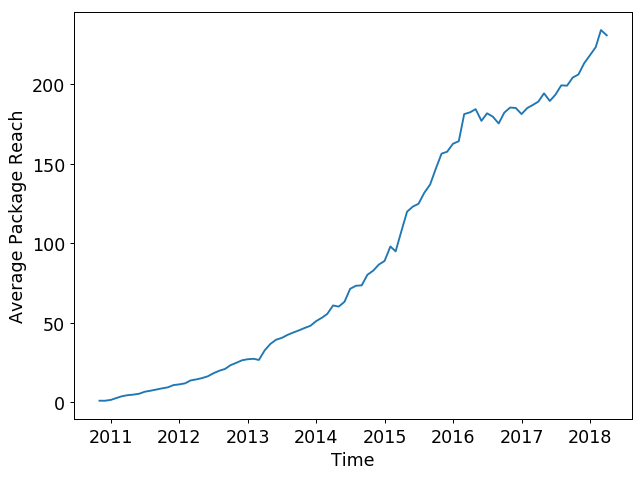

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def transformDf(df, key):
    df[key] = pd.to_datetime(df[key])
    df = df.set_index(key)
    return df

averageDeps = pd.read_json('averageDepsNew.json')

# Reach
dataAvg = pd.read_json('withoutAzer/averagePackageReach.json')
averagePackageReach = transformDf(dataAvg, "Key")

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(8,6), dpi=90)
plt.xlabel('Time')
plt.ylabel('Average Package Reach')
# plt.plot(averageDeps["averagesOut"])
plt.plot(averagePackageReach["Value"])
plt.savefig("withoutAzer/averagePackageReach.png")

SpearmanrResult(correlation=0.84071294559099441, pvalue=1.1384381266747846e-11)
CPU times: user 1.17 s, sys: 313 ms, total: 1.49 s
Wall time: 1.2 s


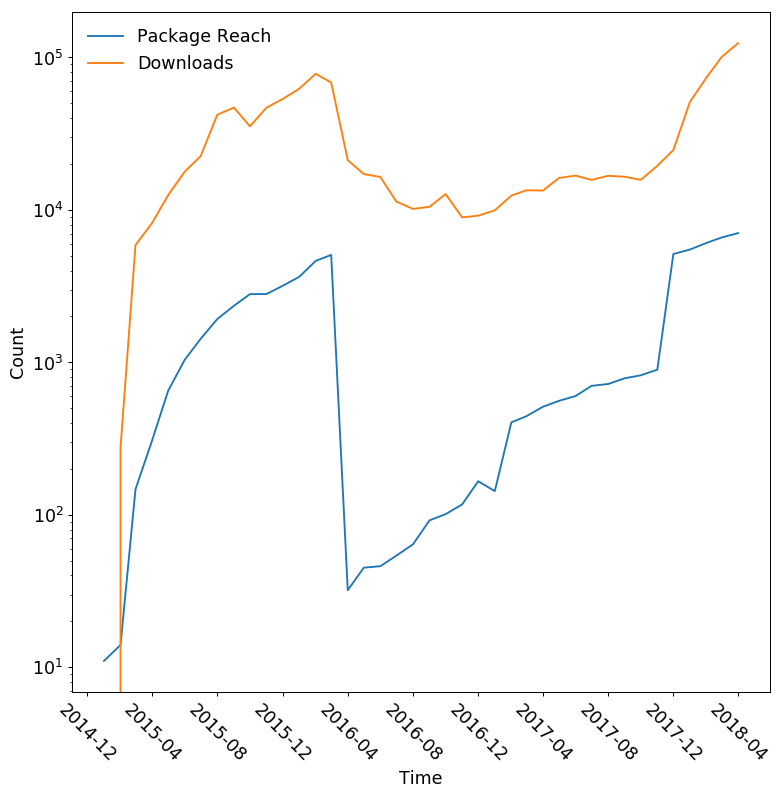

In [3]:
%%time
import scipy.stats
import math

def setIndexToDate(df, avg):
    avg["Key"] = pd.to_datetime(avg["Key"])
    df = df.set_index(avg["Key"])
    return df

dataAvg = pd.read_json('maintainerReach/averageMaintainerReach.json')

packageName = 'left-pad'
packageFileName = packageName.replace('/', '')

# Popularity (downloads) for one package
df = pd.read_json('popularity-average/{}/{}.json'.format(packageFileName[0], packageFileName))
downloads = transformDf(df, "Time")

# Package Reach for one Package
packageReach = pd.read_json('package-reach/{}/{}.json'.format(packageFileName[0], packageFileName))
packageReachDate = setIndexToDate(packageReach, dataAvg)
startTime = df.iloc[0]['Time']
endTime = df.iloc[-1]['Time']
startIndex = packageReachDate.loc[startTime]['X']
endIndex = packageReachDate.loc[endTime]['X']
packageReachTimeSpan = packageReachDate[startIndex:endIndex+1]

# Figure definition
plt.figure(figsize=(10,10), dpi=90)
plt.xlabel('Time')
plt.ylabel('Count')
plt.plot(packageReachTimeSpan["Y"], label='Package Reach')
plt.xticks(rotation=-45)
plt.yscale('log')
plt.plot(downloads["Downloads"], label='Downloads')
plt.legend(loc='best', frameon=False)
plt.savefig("popularityBoost/{}.png".format(packageFileName))

spearman = scipy.stats.spearmanr(packageReachTimeSpan["Y"], downloads["Downloads"], nan_policy='omit')

if not math.isnan(spearman.correlation):
    print(spearman)

In [4]:
# calculate spearman correlation between package reach and average number of downloads per month 

import scipy.stats

import warnings
warnings.filterwarnings(action='ignore')


def setIndexToDate(df, avg):
    avg["Key"] = pd.to_datetime(avg["Key"])
    df = df.set_index(avg["Key"])
    return df

dataAvg = pd.read_json('maintainerReach/averageMaintainerReach.json')

allPackageNames = pd.read_csv("allPackagesNames")

sumSpearman = 0
count = 0


def calculateCorrelation(packageName):
    packageFileName = packageName.replace('/', '')

    # Popularity (downloads) for one package
    df = pd.read_json('popularity-average/{}/{}.json'.format(packageFileName[0], packageFileName))
    downloads = transformDf(df, "Time")

    # Package Reach for one Package
    packageReach = pd.read_json('package-reach/{}/{}.json'.format(packageFileName[0], packageFileName))
    packageReachDate = setIndexToDate(packageReach, dataAvg)
    startTime = df.iloc[0]['Time']
    endTime = df.iloc[-1]['Time']
    startIndex = packageReachDate.loc[startTime]['X']
    endIndex = packageReachDate.loc[endTime]['X']
    packageReachTimeSpan = packageReachDate[startIndex:endIndex+1]

    spearman = scipy.stats.spearmanr(packageReachTimeSpan["Y"], downloads["Downloads"])
    return packageName, spearman
        
from concurrent.futures import ProcessPoolExecutor, as_completed
pool = ProcessPoolExecutor(4)
futures = []

for packageName in allPackageNames['Package']:
    futures.append(pool.submit(calculateCorrelation, packageName))

for x in as_completed(futures):
    spearman = x.result()[1]
    if not math.isnan(spearman.correlation):
        count = count + 1
        sumSpearman = sumSpearman + spearman.correlation
    else:
        print('{} has NaN correlation'.format(x.result()[0]))

@browser-logos/links has NaN correlation
@axetroy/gpm has NaN correlation
@braune-digital/form-utilities has NaN correlation
@back4app/back4app-rest has NaN correlation
@browser-logos/konqueror_4 has NaN correlation
@axetroy/git-clone has NaN correlation
6nimmt-utils has NaN correlation
@braune-digital/angular-query-filter has NaN correlation
@back4app/back4app-entity-mongodb has NaN correlation
@browser-logos/konqueror_1-3 has NaN correlation
@axetroy/flex-grid has NaN correlation
6nimmt-card has NaN correlation
@braposo/styled-system has NaN correlation
@browser-logos/kidzui has NaN correlation
@azinasili/yoga has NaN correlation
@axetroy/flow has NaN correlation
@branu-jp/v-drag has NaN correlation
@bacheio/wp-express has NaN correlation
@browser-logos/k-meleon has NaN correlation
@branu-jp/vue-colorpicker has NaN correlation
6cjxsscyfifgqq48wwvh6r4byjv8xluc has NaN correlation
@bacc/resize-img has NaN correlation
@browser-logos/iridium has NaN correlation
6c has NaN correlation
@ax

@basiclines/leo has NaN correlation
@behance/swiper has NaN correlation
@browser-logos/chrome_12-48 has NaN correlation
@atlaskit/util-common-test has NaN correlation
@basicer/sass-brunch has NaN correlation
@0xcert/ethereum-scanner has NaN correlation
@axa-ch/style-guide has NaN correlation
@behance/svg-converter has NaN correlation
@browser-logos/chrome_1-11 has NaN correlation
@bashleigh/nest-config has NaN correlation
@bem/sdk.naming.file.stringify has NaN correlation
@0xcda7a/test-runner has NaN correlation
@axa-ch/patterns-library has NaN correlation
@behance/stylelint-plugin-behance has NaN correlation
@browser-logos/chrome-dev has NaN correlation
@basharh/react-alert has NaN correlation
@0xcda7a/redux-es6 has NaN correlation
@axa-ch/node-sass-import-once has NaN correlation
@behance/select has NaN correlation
@browser-logos/chrome-canary_19-48 has NaN correlation
@basharh/arabic-reshaper has NaN correlation
@0xcda7a/path-to-regexp-es6 has NaN correlation
@axa-ch/eslint-config-a

@byhealth/native-jssdk has NaN correlation
1701server1 has NaN correlation
@belong-ui/select-dropdown has NaN correlation
57160694 has NaN correlation
@blitt/tslint-perkd-rules has NaN correlation
@4geit/rct-template has NaN correlation
9f has NaN correlation
@broid/line has NaN correlation
@ahfarmer/http-mitm-proxy has NaN correlation
@alex1712/react-bootstrap-datetimepicker has NaN correlation
@absolunet/nwayo-workflow has NaN correlation
@alu0100785265/ull-shape-lucas-triangulo has NaN correlation
@alex-wilmer/react-lolliplot has NaN correlation
@coderbox/themes has NaN correlation
@absolunet/nwayo-cli has NaN correlation
@alex-wilmer/lolliplot has NaN correlation
@brad-jones/tsos-visitors has NaN correlation
255kb-meteor-status-client-side has NaN correlation
@altrdpdgm/resource-manager has NaN correlation
@altrdpdgm/router has NaN correlation
@ahadrt/testpack-1 has NaN correlation
2508test-npm-publish has NaN correlation
@alex-roman/oli has NaN correlation
@coderbox/molecules has 

@amk221/ember-autofocus has NaN correlation
@4geit/rct-component-builder has NaN correlation
@amio/nrm has NaN correlation
@addepar/sass-lint-config has NaN correlation
@bigtest/mirage has NaN correlation
@artisnull/asyncquence has NaN correlation
@amitport/auth-server has NaN correlation
@classflow/after-emit-compression-plugin has NaN correlation
@addepar/pop-menu has NaN correlation
008-mysql has NaN correlation
@amio/micro-cors has NaN correlation
@appointer/iconfont has NaN correlation
@bigtest/interaction has NaN correlation
@amnisio/arduino-uno has NaN correlation
@artificialsolutions/tie-api-client has NaN correlation
@amitport/koangular has NaN correlation
@4geit/rct-collapsible-component has NaN correlation
@classboxteam/react-draft-wysiwyg has NaN correlation
@addepar/ice-pop has NaN correlation
@appnest/web-router has NaN correlation
@artifacter/worker has NaN correlation
@classboxteam/draft-js has NaN correlation
005http has NaN correlation
@appnest/web-config has NaN corr

@artemv/dont-break has NaN correlation
@buttercup/locust has NaN correlation
509dave16-starwars-names has NaN correlation
@brillout/html-head has NaN correlation
@bryce-gibson/inquirer-file-path has NaN correlation
@artemv/circle-step-outputter has NaN correlation
@buttercup/iconographer has NaN correlation
5082 has NaN correlation
@bouncingpixel/express-redirector has NaN correlation
@bryanwood/webpack-plugin-notifier has NaN correlation
@artemiy71/test has NaN correlation
@angular-projax/data has NaN correlation
@angular-moon/webpack-scp-client has NaN correlation
507 has NaN correlation
@brillout/get-user-dir has NaN correlation
@bryanwood/strip-assert-loader has NaN correlation
@artemis-prime/react-smart-media has NaN correlation
@buttercup/datasources has NaN correlation
@angular-react/core has NaN correlation
@angular-mdl/datepicker has NaN correlation
@bryanwood/soda-autocomplete has NaN correlation
@artemis-prime/react-menus has NaN correlation
@buttercup/credentials has NaN co

123qwe has NaN correlation
2017-11-27-ls-123 has NaN correlation
@audi/audi-type has NaN correlation
@azmenak/react-beam has NaN correlation
@botkit/share-code has NaN correlation
3048m has NaN correlation
123gendiff123456 has NaN correlation
2017-11-27-hello has NaN correlation
@audi/audi-icon has NaN correlation
@azhou/mysql-wrapper has NaN correlation
@botique/smartmon has NaN correlation
123a has NaN correlation
2017-11-27-13-44 has NaN correlation
@audentio/utils has NaN correlation
@azhou/basemodel has NaN correlation
@botique/react-behavior has NaN correlation
123_first_1234 has NaN correlation
@beisen/moment has NaN correlation
2017-11-27-11 has NaN correlation
@audentio/eslint-config-standard has NaN correlation
@botique/libphonenumber-js has NaN correlation
300nm has NaN correlation
1234gendiff123456 has NaN correlation
@beisen/mission-list has NaN correlation
2017-10-28-rn has NaN correlation
@audentio/editor has NaN correlation
@azhder/pingman has NaN correlation
@botique/b

@betafcc/base-converter has NaN correlation
@automaid/scenes-service has NaN correlation
@ayetier/node-restclient has NaN correlation
@bose/iut-encrypt has NaN correlation
@bb-cli/generator-module has NaN correlation
@betadigitalproduction/ngx-viewport-service has NaN correlation
@automaid/rss-service has NaN correlation
@bb-cli/generator-model-bb has NaN correlation
@betadigitalproduction/ngx-social-share-service has NaN correlation
@automaid/philips-hue-service has NaN correlation
@ayetier/node-eventsystem has NaN correlation
@bb-cli/generator-ext-bb-ng has NaN correlation
@betadigitalproduction/ngx-platform-service has NaN correlation
@automaid/hdmi-cec-service has NaN correlation
@ayetier/node-cache has NaN correlation
@blackbaud/skyux-lib-testing has NaN correlation
20161120test has NaN correlation
@chromapdx/cbc-nft has NaN correlation
@aabegg/ap-content has NaN correlation
@brickify/m-middleware has NaN correlation
@bruitt/actions has NaN correlation
@beisen/l-concat has NaN cor

@bkulzick/starter has NaN correlation
@bmat/translation-management has NaN correlation
@a-sync/opencv4nodejs has NaN correlation
@andromeda/logger has NaN correlation
@borngroup/born-megamenu has NaN correlation
@caseyross/react-select has NaN correlation
@achingbrain/node-syslog has NaN correlation
@bkulzick/my-app has NaN correlation
@bmat/icons has NaN correlation
777-matchers has NaN correlation
@borngroup/born-flexgrid has NaN correlation
@case/utils has NaN correlation
@achingbrain/ngrok has NaN correlation
@bkp7/schema-js-api has NaN correlation
@bmat/fonts has NaN correlation
777-data-structures has NaN correlation
@andriyf/test-component-1 has NaN correlation
@borngroup/born-fixit has NaN correlation
@case/iscool has NaN correlation
@achicu/babel-plugin-dead-code-elimination has NaN correlation
@bkniffler/react-universally-dev has NaN correlation
@bmat/angular-inputmask has NaN correlation
@a-ignatov-parc/react-resolver has NaN correlation
777 has NaN correlation
@borngroup/bo

@1studio/ui has NaN correlation
@cgjs/tls has NaN correlation
@bjoerge/http-browserify has NaN correlation
444 has NaN correlation
@1stdibs/react-portal has NaN correlation
718 has NaN correlation
@bjke/date-formater has NaN correlation
44.npm has NaN correlation
@1natsu/wait-element has NaN correlation
701-nodejs-api has NaN correlation
@cgjs/string_decoder has NaN correlation
@bjacobel/cloudformer-node has NaN correlation
44 has NaN correlation
@1backend/user-sjocruphby4b-node-test-ng has NaN correlation
@ambassify/eventbus has NaN correlation
@cgjs/stream has NaN correlation
@biznas/ng-tslint-rules has NaN correlation
4399 has NaN correlation
70 has NaN correlation
@1backend/user-sjocruphby4b-go-test-ng has NaN correlation
@cgjs/repl has NaN correlation
@biznas/ng-security-framer has NaN correlation
7.js has NaN correlation
@ambassify/language-object has NaN correlation
@1backend/user-nj6dbwjq04tl-go-test-ng has NaN correlation
@cgjs/readline has NaN correlation
@ambassify/fetch-que

@airyrooms/nerve has NaN correlation
@cognite/cognitesdk has NaN correlation
@amctech/web-ui has NaN correlation
@airyrooms/direct-user-feature-sdk has NaN correlation
@cognistreamer/np has NaN correlation
@airyrooms/catela has NaN correlation
@cognistreamer/lerna-windows-compat has NaN correlation
@airyrooms/apparel has NaN correlation
@cognigy/wndb-with-exceptions has NaN correlation
@amicus/broadcasting has NaN correlation
@amio/import-json has NaN correlation
@amicus/support has NaN correlation
@amilajack/oracledb has NaN correlation
@airyrooms/apollo-sdk has NaN correlation
@cognigy/node-wordnet has NaN correlation
@amidoltd/shared-req-res-handler has NaN correlation
@amctech/web-middleware has NaN correlation
@amino-css/ribosome has NaN correlation
@airx/swagger-hook has NaN correlation
@cognigy/cognigy-web-client has NaN correlation
@amctech/krueger-ui has NaN correlation
@airx/sdk has NaN correlation
@cognigy/cognigy-client has NaN correlation
@amd-core/webpack-config has NaN c

@conejito/auth has NaN correlation
@conexus-vn/autocomplete has NaN correlation
@conexus-vn/components has NaN correlation
@conexus-vn/inputmask has NaN correlation
@conexus-vn/libraries has NaN correlation
@conexus-vn/styles has NaN correlation
@conexus-vn/treeview has NaN correlation
@configurator/ampm has NaN correlation
@conexus-vn/floatlabel has NaN correlation
@configurator/ravendb has NaN correlation
@conga/conga has NaN correlation
@confuser/eslint-config has NaN correlation
@conga/bass-express-session has NaN correlation
@conga/framework-dashboard has NaN correlation
@conga/framework-bass has NaN correlation
@conga/framework-profiler has NaN correlation
@conga/framework-rest has NaN correlation
@conga/framework-session has NaN correlation
@conga/framework-validation has NaN correlation
@conga/framework-webpack has NaN correlation
@conglomerate/diff has NaN correlation
@conglomerate/dom-event has NaN correlation
@conglomerate/element-dataset has NaN correlation
@conglomerate/ex

@coreui/react has NaN correlation
@coreui/styles has NaN correlation
@coreuipro/styles has NaN correlation
@coreui/vue has NaN correlation
@cork-labs/config-reader has NaN correlation
@cork-labs/monkfish-adapter-logger has NaN correlation
@cork-labs/monkfish-port-http has NaN correlation
@corllete/material-styled has NaN correlation
@cormacks/modules has NaN correlation
@corn-code/breadcrumbs has NaN correlation
@corpsmap/autocomplete has NaN correlation
@corpsmap/corpsmap_argon has NaN correlation
@corpsmap/json-to-csv-download has NaN correlation
@corpsmap/reflux has NaN correlation
@corpsmap/simple-oracledb-wrapper has NaN correlation
@corpsmap/sql_build_generator has NaN correlation
@corpsmap/simplequery has NaN correlation
@corpsmap/to-snake-case has NaN correlation
@cortexql/core has NaN correlation
@cortexql/dataloader has NaN correlation
@cortexql/types has NaN correlation
@cortys/johnson-path-finder has NaN correlation
@cosaca/ull-shape-triangle has NaN correlation
@coshare/bo

@creately/rxdata-es6 has NaN correlation
@creately/snapsvg has NaN correlation
@creately/rxflow has NaN correlation
@createview/mqtt-manager has NaN correlation
@creativebrandon/cryptocurrency-icons has NaN correlation
@creately/tinymce has NaN correlation
@creativefeather/config has NaN correlation
@creativefeather/electron-toolkit has NaN correlation
@creativefew/stylelib has NaN correlation
@creativefew/ngx-expandable has NaN correlation
@creditkarma/dynamic-config has NaN correlation
@creditkarma/good-influx has NaN correlation
@creditkarma/hapi-galaxy has NaN correlation
@creditkarma/graphql-validator has NaN correlation
@creditkarma/thrift-client has NaN correlation
@creditkarma/thrift-server-express has NaN correlation
@creditkarma/thrift-server-hapi has NaN correlation
@creditkarma/thrift-utils has NaN correlation
@creditkarma/thrift-typescript has NaN correlation
@credo/cache has NaN correlation
@credo/countries has NaN correlation
@credo/config has NaN correlation
@credo/exce

@csnext/cs-server has NaN correlation
@csnext/vue-cli-plugin-cs has NaN correlation
@cspanring/ember-cli-swiper has NaN correlation
@cspanring/ember-font-awesome has NaN correlation
@cspanring/ember-quill has NaN correlation
@cspanring/ember-metrics has NaN correlation
@cspanring/ember-cli-trackjs has NaN correlation
@cspanring/ember-tooltips has NaN correlation
@csphere/react-form-utils has NaN correlation
@csphere/react-xterm has NaN correlation
@cspotcode/gitlogg has NaN correlation
@cspotcode/cross-spawn has NaN correlation
@cspotcode/nsh has NaN correlation
@cspotcode/query-string has NaN correlation
@cspotcode/promise-auto has NaN correlation
@cspotcode/render-cli has NaN correlation
@cssbrasil/animated-icons has NaN correlation
@csvn/ng-test-lib has NaN correlation
@cswl/nrs has NaN correlation
@cszatma/react-scripts has NaN correlation
@ct0r/fs has NaN correlation
@ctco-dev/tslint-config-angular has NaN correlation
@ctco-dev/tslint-config-react has NaN correlation
@ctek/ruth ha

@cw-types/ora has NaN correlation
@cw-types/react-dnd has NaN correlation
@cw/tsconfigs has NaN correlation
@cwanner/lambda-pure-prompt has NaN correlation
@cwds/cals-api-client has NaN correlation
@cw/tsconfig has NaN correlation
@cwmoo740/react-infinite has NaN correlation
@cwhegarty/how-to-npm has NaN correlation
@cxa/bs-json-keypather has NaN correlation
@cxbrooks/accessors has NaN correlation
@cxcloud/core has NaN correlation
@cxk280/smtp-connection has NaN correlation
@cxcloud/process-engine-core has NaN correlation
@cxk280/smtp-connection-2 has NaN correlation
@cxl/docma has NaN correlation
@cxl/inference has NaN correlation
@cxl/workspace has NaN correlation
@cxl/workspace.angular has NaN correlation
@cxl/workspace.bower has NaN correlation
@cxl/workspace.css has NaN correlation
@cxl/workspace.git has NaN correlation
@cxl/workspace.dragdrop has NaN correlation
@cxl/workspace.grep has NaN correlation
@cxl/workspace.javascript has NaN correlation
@cxl/workspace.jshint has NaN cor

@danielhuisman/endpoints has NaN correlation
@danielkalen/hash-sum has NaN correlation
@danielkalen/mochawesome-report-generator has NaN correlation
@danielkalen/nightwatch has NaN correlation
@danielkalen/polyfills has NaN correlation
@danielkalen/print-code has NaN correlation
@danielkalen/utils has NaN correlation
@danielkucal/ng2-bootstrap has NaN correlation
@danielmahon/versionist-plugins has NaN correlation
@danielmyerfenton/react-native-aws3 has NaN correlation
@danielnixon/vdom-parser has NaN correlation
@danielpqe/platzom has NaN correlation
@danielr1996/component-library has NaN correlation
@danielr1996/jumpto has NaN correlation
@danielr1996/led-cli has NaN correlation
@danielr1996/led-gateway has NaN correlation
@danielr1996/led-mqtt has NaN correlation
@danielr1996/led-ws has NaN correlation
@danielr1996/led-rest has NaN correlation
@danielr1996/ng-mqtt has NaN correlation
@danielr1996/preserve-queryparams has NaN correlation
@danielr1996/smooth-scroll has NaN correlation

@datafire/amazonaws_cognito_identity has NaN correlation
@datafire/amazonaws_codedeploy has NaN correlation
@datafire/amazonaws_codestar has NaN correlation
@datafire/amazonaws_cognito_idp has NaN correlation
@datafire/amazonaws_cognito_sync has NaN correlation
@datafire/amazonaws_comprehend has NaN correlation
@datafire/amazonaws_cur has NaN correlation
@datafire/amazonaws_config has NaN correlation
@datafire/amazonaws_data_jobs_iot has NaN correlation
@datafire/amazonaws_datapipeline has NaN correlation
@datafire/amazonaws_data_iot has NaN correlation
@datafire/amazonaws_data_mediastore has NaN correlation
@datafire/amazonaws_dax has NaN correlation
@datafire/amazonaws_discovery has NaN correlation
@datafire/amazonaws_devicefarm has NaN correlation
@datafire/amazonaws_directconnect has NaN correlation
@datafire/amazonaws_dms has NaN correlation
@datafire/amazonaws_ds has NaN correlation
@datafire/amazonaws_dynamodb has NaN correlation
@datafire/amazonaws_ec2 has NaN correlation
@data

@datafire/azure-arm-compute-containerservice has NaN correlation
@datafire/azure-arm-dns has NaN correlation
@datafire/azure-arm-containerregistry has NaN correlation
@datafire/azure-arm-devtestlabs has NaN correlation
@datafire/azure-arm-documentdb has NaN correlation
@datafire/azure-arm-eventhub has NaN correlation
@datafire/azure-arm-iothub has NaN correlation
@datafire/azure-arm-keyvault has NaN correlation
@datafire/azure-arm-intune has NaN correlation
@datafire/azure-arm-insights has NaN correlation
@datafire/azure-arm-logic has NaN correlation
@datafire/azure-arm-machinelearning-webservices has NaN correlation
@datafire/azure-arm-machinelearning-commitmentplans has NaN correlation
@datafire/azure-arm-mediaservices has NaN correlation
@datafire/azure-arm-notificationhubs has NaN correlation
@datafire/azure-arm-network has NaN correlation
@datafire/azure-arm-mobileengagement has NaN correlation
@datafire/azure-arm-powerbiembedded has NaN correlation
@datafire/azure-arm-recoveryser

@datafire/azure_domainservices has NaN correlation
@datafire/azure_eventhub_eventhub has NaN correlation
@datafire/azure_hdinsight_applications has NaN correlation
@datafire/azure_hdinsight_capabilities has NaN correlation
@datafire/azure_eventgrid_eventgrid has NaN correlation
@datafire/azure_hdinsight_cluster has NaN correlation
@datafire/azure_hdinsight_configurations has NaN correlation
@datafire/azure_hdinsight_operations has NaN correlation
@datafire/azure_hdinsight_extensions has NaN correlation
@datafire/azure_hdinsight_scriptactions has NaN correlation
@datafire/azure_insights has NaN correlation
@datafire/azure_intune has NaN correlation
@datafire/azure_iothub has NaN correlation
@datafire/azure_keyvault has NaN correlation
@datafire/azure_locationbasedservices has NaN correlation
@datafire/azure_logic has NaN correlation
@datafire/azure_machinelearning_commitmentplans has NaN correlation
@datafire/azure_machinelearning_webservices has NaN correlation
@datafire/azure_machinel

@datafire/box_authorization has NaN correlation
@datafire/botify has NaN correlation
@datafire/box_content has NaN correlation
@datafire/blazemeter has NaN correlation
@datafire/box_token has NaN correlation
@datafire/box_upload has NaN correlation
@datafire/brandlovers has NaN correlation
@datafire/browshot has NaN correlation
@datafire/bufferapp has NaN correlation
@datafire/bungie has NaN correlation
@datafire/caldav has NaN correlation
@datafire/callfire has NaN correlation
@datafire/cambase has NaN correlation
@datafire/ccp_is has NaN correlation
@datafire/cenit has NaN correlation
@datafire/channel4 has NaN correlation
@datafire/circleci has NaN correlation
@datafire/circuitsandbox has NaN correlation
@datafire/cisco has NaN correlation
@datafire/citrix-gotomeeting has NaN correlation
@datafire/citrix-gotoassistseeit has NaN correlation
@datafire/citrix-gototraining has NaN correlation
@datafire/citrix-gotowebinar has NaN correlation
@datafire/citrix-scim has NaN correlation
@dat

@datafire/google_adexchangebuyer2 has NaN correlation
@datafire/google_adexperiencereport has NaN correlation
@datafire/google_adexchangeseller has NaN correlation
@datafire/google_adsense has NaN correlation
@datafire/google_adsensehost has NaN correlation
@datafire/google_analytics has NaN correlation
@datafire/google_admin has NaN correlation
@datafire/google_androiddeviceprovisioning has NaN correlation
@datafire/google_androidenterprise has NaN correlation
@datafire/google_analyticsreporting has NaN correlation
@datafire/google_androidmanagement has NaN correlation
@datafire/google_appengine has NaN correlation
@datafire/google_androidpublisher has NaN correlation
@datafire/google_appsactivity has NaN correlation
@datafire/google_bigquery has NaN correlation
@datafire/google_appstate has NaN correlation
@datafire/google_bigquerydatatransfer has NaN correlation
@datafire/google_blogger has NaN correlation
@datafire/google_civicinfo has NaN correlation
@datafire/google_books has NaN

@datafire/lucybot_docs has NaN correlation
@datafire/lufthansa_partner has NaN correlation
@datafire/lufthansa_public has NaN correlation
@datafire/lyft has NaN correlation
@datafire/magick.nu has NaN correlation
@datafire/mailchimp has NaN correlation
@datafire/magick_nu has NaN correlation
@datafire/magento has NaN correlation
@datafire/mandrillapp has NaN correlation
@datafire/mashape_geodb has NaN correlation
@datafire/mcw_edu has NaN correlation
@datafire/medium has NaN correlation
@datafire/microsoft_cognitiveservices_customsearch has NaN correlation
@datafire/microsoft_cognitiveservices_entitysearch has NaN correlation
@datafire/microsoft_cognitiveservices_imagesearch has NaN correlation
@datafire/microsoft_cognitiveservices_spellcheck has NaN correlation
@datafire/microsoft_cognitiveservices_newssearch has NaN correlation
@datafire/microsoft_cognitiveservices_videosearch has NaN correlation
@datafire/microsoft_cognitiveservices_websearch has NaN correlation
@datafire/microsoft_

@datafire/xero has NaN correlation
@datafire/xkcd has NaN correlation
@datafire/youphoric has NaN correlation
@datafire/yellowpages has NaN correlation
@datafire/zalando has NaN correlation
@datafire/zappiti has NaN correlation
@datafire/zoom_us has NaN correlation
@datafire/yunbi has NaN correlation
@datafire/zoomconnect has NaN correlation
@datafire/zuora has NaN correlation
@datagica/classify-hiring-document has NaN correlation
@datagica/count-entities has NaN correlation
@datagica/entity has NaN correlation
@datagica/find-free-time-slot has NaN correlation
@datagica/graph has NaN correlation
@datagica/incremental-merge has NaN correlation
@datagica/magnitude has NaN correlation
@datagica/match-entities has NaN correlation
@datagica/match-skills has NaN correlation
@datagica/parse-birthdates has NaN correlation
@datagica/parse-age has NaN correlation
@datagica/parse-date-intervals has NaN correlation
@datagica/parse-locale has NaN correlation
@datagica/parse-location has NaN correla

@dchambers/es5-module has NaN correlation
@dchambers/es6-module has NaN correlation
@dcheng168/react-scripts has NaN correlation
@dcgauld/gerard has NaN correlation
@dcl/react-native-ddvideo has NaN correlation
@dcntrlzd/helios has NaN correlation
@dcos/eslint-config has NaN correlation
@dcos/mesos-client has NaN correlation
@dcos/tslint-config has NaN correlation
@dcos/ui-kit has NaN correlation
@dcousineau/gulp-po-concat has NaN correlation
@dcousineau/gulp-xgettext has NaN correlation
@dcs/angular2-utils has NaN correlation
@dcs/ng-components has NaN correlation
@dcs/ngx-build-tools has NaN correlation
@dcs/ngx-components has NaN correlation
@dcs/ngx-lib-starter has NaN correlation
@dcs/ngx-tools has NaN correlation
@dcs/redux-tools has NaN correlation
@dcs/ngx-utils has NaN correlation
@dcs/redux-utils has NaN correlation
@dcueto/platzom has NaN correlation
@dcv/phosphor has NaN correlation
@dcv/react-fine-uploader has NaN correlation
@dd-decaf/metabolica-map has NaN correlation
@d

@delucis/reading-data-yaml-loader has NaN correlation
@delvedor/volatile has NaN correlation
@demands/eslint-plugin-import has NaN correlation
@demeshik2012/gitpackage has NaN correlation
@demgel/sockets has NaN correlation
@demgel/mvc has NaN correlation
@demersdesigns/styleplate has NaN correlation
@demgel/validation has NaN correlation
@demiazz/brandon has NaN correlation
@demiazz/fluxxor has NaN correlation
@demivan/janus-gateway has NaN correlation
@demivan/kurento-jsonrpc has NaN correlation
@demivan/lib-jitsi-meet has NaN correlation
@demo.npm.amit/demo4 has NaN correlation
@democracy-deutschland/dip21-scraper has NaN correlation
@demoiselle/http has NaN correlation
@democracyos/video-url-inspector has NaN correlation
@demonoid/how-to-npm has NaN correlation
@demoiselle/security has NaN correlation
@demostf/demo.js has NaN correlation
@denali-js/babel has NaN correlation
@denali-js/eslint has NaN correlation
@denali-js/orm-adapter-tests has NaN correlation
@dendra-science/api-ho

@destinationstransfers/geo has NaN correlation
@destinationstransfers/eslint-config has NaN correlation
@destinationstransfers/fetch has NaN correlation
@destinationstransfers/git-rev-sync has NaN correlation
@destinationstransfers/ntp has NaN correlation
@destinationstransfers/google-localized-domain has NaN correlation
@destiny-item-manager/apikey has NaN correlation
@destinationstransfers/ratelimiter has NaN correlation
@destinationstransfers/passkit has NaN correlation
@destiny-item-manager/zip.js has NaN correlation
@desynit/dsy-sfdx-plugins has NaN correlation
@detox/chat has NaN correlation
@detox/simple-peer has NaN correlation
@detroit-labs/tslint-config has NaN correlation
@detroit-labs/safe-math has NaN correlation
@dev-engage/jumpstart-template has NaN correlation
@detroit-labs/klondike has NaN correlation
@dev-engage/stencil-bootstrap has NaN correlation
@dev-engage/typescript-firebase has NaN correlation
@dev-engage/universal-core has NaN correlation
@dev-it-acs/empty-tex

@digicat/compute-ethereum-account-address has NaN correlation
@digicat/ethereum-contract-watcher has NaN correlation
@digicat/ethereum-transaction-watcher has NaN correlation
@digicat/ethereum-extract-contract-events has NaN correlation
@digicat/ethereum-finality-watcher has NaN correlation
@digicat/termination-manager has NaN correlation
@digidem/extract-react-intl-messages has NaN correlation
@digihaus/monogatari has NaN correlation
@digidem/id has NaN correlation
@digihum/falcon-core has NaN correlation
@digihum/react-edtf-editor has NaN correlation
@digihum/react-geojson-editor has NaN correlation
@digilabs/ngest-ig has NaN correlation
@digilar/dotenv-url has NaN correlation
@digilent/digilent-lambda-js has NaN correlation
@digilent/dip-js has NaN correlation
@digilent/linx-js has NaN correlation
@digilent/product-database-client has NaN correlation
@digital-engineers/babel-preset-reactivation has NaN correlation
@digital-engineers/eslint-config-reactivation has NaN correlation
@di

@dl2/express has NaN correlation
@dleavitt/react-css-transition has NaN correlation
@dlani-web/angular2-token has NaN correlation
@dlf414/cwp-22-1 has NaN correlation
@dlghq/babel-preset-dialog has NaN correlation
@dlevs/photoswipe has NaN correlation
@dlghq/dialog-bot-sdk has NaN correlation
@dlghq/dialog-components has NaN correlation
@dlghq/dialog-native-components has NaN correlation
@dlghq/dialog-node-client has NaN correlation
@dlghq/pace-progress has NaN correlation
@dlghq/eslint-config-dialog has NaN correlation
@dlghq/indexed-db has NaN correlation
@dlghq/postcss-dialog has NaN correlation
@dlghq/spectacle-docs has NaN correlation
@dlghq/stylelint-config-dialog has NaN correlation
@dlghq/react-scroll has NaN correlation
@dliv/minject has NaN correlation
@dlive/videojs-resolution-switcher has NaN correlation
@dlmanning/webpack-dev-server has NaN correlation
@dloose/webpack-bugsnag-plugin has NaN correlation
@dlmanning/bind has NaN correlation
@dlop3469/node-module has NaN corre

@domoinc/ca-process-circle has NaN correlation
@domoinc/ca-post-indicators has NaN correlation
@domoinc/ca-small-placing-stand has NaN correlation
@domoinc/ca-stage-progress has NaN correlation
@domoinc/ca-progress-bar-with-text has NaN correlation
@domoinc/ca-stats-center-icon has NaN correlation
@domoinc/ca-stats-circle has NaN correlation
@domoinc/ca-stats-corner-icon has NaN correlation
@domoinc/ca-stats-pill has NaN correlation
@domoinc/ca-steps-with-text has NaN correlation
@domoinc/ca-trend-number has NaN correlation
@domoinc/ca-weather-icons has NaN correlation
@domoinc/ca-time-summary-number has NaN correlation
@domoinc/canada-fsa-map has NaN correlation
@domoinc/carousel has NaN correlation
@domoinc/chord-diagram has NaN correlation
@domoinc/count-date-clock has NaN correlation
@domoinc/countdown-clock-circle has NaN correlation
@domoinc/da-certification has NaN correlation
@domoinc/da-plop has NaN correlation
@domoinc/da-styles has NaN correlation
@domoinc/daily-trend-timeli

@doxteam/error-handler has NaN correlation
@doxteam/reference-data has NaN correlation
@doxteam/service has NaN correlation
@dozoisch/react-scripts has NaN correlation
@dpc-sdp/ripple-global has NaN correlation
@dpc-sdp/ripple has NaN correlation
@dpc-sdp/ripple-primary-navigation has NaN correlation
@dpogue/cordova-android has NaN correlation
@dpogue/cordova-plugin-crosswalk-webview has NaN correlation
@dpogue/cordova-plugin-wkwebview-engine has NaN correlation
@dpogue/cordova-plugin-file-transfer has NaN correlation
@dpogue/dexie has NaN correlation
@dpogue/sockjs has NaN correlation
@dpoineau/react-scripts has NaN correlation
@dpratt/node-k8s-client has NaN correlation
@dptole/al-api has NaN correlation
@dptole/base2pn.js has NaN correlation
@dptole/toylang has NaN correlation
@dptoot/react-element-to-jsx-string has NaN correlation
@dpwanjala/about has NaN correlation
@dpwanjala/auth has NaN correlation
@dpwanjala/component-kit has NaN correlation
@dpwanjala/dpmodule has NaN correla

@duanzm/fsutil has NaN correlation
@dubsmash/dubsmash-frontend-shared has NaN correlation
@duca/react-scripts has NaN correlation
@ducret201/react-pdfkit has NaN correlation
@dudadev/lambda-logging has NaN correlation
@dudadev/mobx-react has NaN correlation
@dudadev/postcss-flexibility has NaN correlation
@dudadev/random-img has NaN correlation
@dudeofawesome/chrome-headless-render-pdf has NaN correlation
@dudes/lumly.uml.viewer has NaN correlation
@dudousxd/monad_ts has NaN correlation
@duivvv/react-scripts has NaN correlation
@dummycreator/dummy-package-b has NaN correlation
@dummycreator/dummy-package-c has NaN correlation
@dump247/storybook-state has NaN correlation
@dumpster/hast-react-renderer has NaN correlation
@dumpster/remark-custom-element-to-hast has NaN correlation
@dunnbot/auth has NaN correlation
@dunnbot/greeter has NaN correlation
@dunnbot/help has NaN correlation
@dunnbot/karma has NaN correlation
@dunnbot/logger has NaN correlation
@dunnbot/pinky has NaN correlation


@easy-webpack/config-env-development has NaN correlation
@easy-webpack/config-eslint has NaN correlation
@easy-webpack/config-external-source-maps has NaN correlation
@easy-webpack/config-env-production has NaN correlation
@easy-webpack/config-fonts-and-images has NaN correlation
@easy-webpack/config-generate-index-html has NaN correlation
@easy-webpack/config-global-bluebird has NaN correlation
@easy-webpack/config-global-jquery has NaN correlation
@easy-webpack/config-global-regenerator has NaN correlation
@easy-webpack/config-html has NaN correlation
@easy-webpack/config-json has NaN correlation
@easy-webpack/config-less has NaN correlation
@easy-webpack/config-offline has NaN correlation
@easy-webpack/config-output-library has NaN correlation
@easy-webpack/config-pug has NaN correlation
@easy-webpack/config-sass has NaN correlation
@easy-webpack/config-source-map-support has NaN correlation
@easy-webpack/config-test-coverage-istanbul has NaN correlation
@easy-webpack/config-tslint 

@edgeguideab/datepicker has NaN correlation
@edgeguideab/expect has NaN correlation
@edgeguideab/requestor has NaN correlation
@edgeguideab/password-check has NaN correlation
@edgji/antd has NaN correlation
@editjs/editjs has NaN correlation
@edmdesigner/contenteditor-connector has NaN correlation
@edmdesigner/htmlimport-connector has NaN correlation
@edmdesigner/jsonpreview-connector has NaN correlation
@edmdesigner/layouteditor-connector has NaN correlation
@edmdesigner/supergallery-connector has NaN correlation
@edmdesigner/superpreview-connector has NaN correlation
@edmdesigner/templatelayer-connector has NaN correlation
@ednagc/ull-shape-rectangle-ednagc has NaN correlation
@ednagc/ull-shape-square-ednagc has NaN correlation
@ednagc/ull-shape-triangle-ednagc has NaN correlation
@edools/bamboo-linter has NaN correlation
@edouard.lauret/telegram-node-bot has NaN correlation
@edpaget/react-router has NaN correlation
@eduardoroyer/number-formatter has NaN correlation
@edtorres/platzom

@elavoie/electron-webrtc has NaN correlation
@elboman/remark-jsx has NaN correlation
@elbo/nyerk has NaN correlation
@eldarlabs/cycle-ui-typescript-webpack has NaN correlation
@eldarlabs/phenomic has NaN correlation
@elderbyte/ngx-jwt-auth has NaN correlation
@elderbyte/ngx-simple-webstorage has NaN correlation
@elderbyte/ngx-starter has NaN correlation
@elderbyte/ngx-stomp has NaN correlation
@elderbyte/ts-logger has NaN correlation
@elderbyte/ts-stomp has NaN correlation
@eldisniper/cape-js has NaN correlation
@electerious/formalize has NaN correlation
@electerious/basictasks has NaN correlation
@electerious/modulizer has NaN correlation
@electorrent/node-rtorrent has NaN correlation
@electron-boilerplate/sentry has NaN correlation
@electron-boilerplate/titlebar has NaN correlation
@electron-builder/test-smart-unpack-empty has NaN correlation
@electron-builder/test-smart-unpack has NaN correlation
@electron-elements/send-feedback has NaN correlation
@electron-elements/utils has NaN c

@emmiep/eslint-config has NaN correlation
@emmiep/babel-plugin-strip-parcel-hmr has NaN correlation
@emmiep/rollup-plugin-split-bundle has NaN correlation
@emonkak/di has NaN correlation
@emonkak/enumerable has NaN correlation
@emotion/babel-utils has NaN correlation
@emotion/core has NaN correlation
@emotion/css.macro has NaN correlation
@emotion/global has NaN correlation
@emotion/dynamic has NaN correlation
@emotion/is-prop-valid has NaN correlation
@emotion/jest has NaN correlation
@emotion/jsx has NaN correlation
@emotion/keyframes has NaN correlation
@emotion/memoize has NaN correlation
@emotion/provider has NaN correlation
@emotion/snapshot-serializer has NaN correlation
@emotion/style has NaN correlation
@emotion/styled.macro has NaN correlation
@emotion/styled has NaN correlation
@emraji/platzom has NaN correlation
@emotionreader/ui has NaN correlation
@empaq/empaq-test-src has NaN correlation
@emtwo/ping-centre has NaN correlation
@emtypes/isstream has NaN correlation
@emtype

@eonse/webui-config has NaN correlation
@epages/immutable-api-records has NaN correlation
@epages/react-components has NaN correlation
@epam/changed has NaN correlation
@epam/dev-err-handler has NaN correlation
@epam/dev-error-handler has NaN correlation
@epam/ngx-modal has NaN correlation
@epelc/angular-material-data-table has NaN correlation
@epelc/gridstack-angular has NaN correlation
@epelc/gridstack has NaN correlation
@epelc/mousetrap has NaN correlation
@epelc/jquery-ui-touch-punch has NaN correlation
@epelc/transformer-proxy has NaN correlation
@ephetic/checked-constants has NaN correlation
@ephetic/react-hot-boilerplate has NaN correlation
@ephetic/typed has NaN correlation
@ephox/bedrock has NaN correlation
@ephox/mcagar has NaN correlation
@ephox/photon has NaN correlation
@ephox/refute has NaN correlation
@ephox/swag has NaN correlation
@epidemico/epi-ui has NaN correlation
@epiphanysoft/watchable has NaN correlation
@episodehunter/kingsguard has NaN correlation
@episodehun

@essential-projects/graphql_http has NaN correlation
@essential-projects/http_integration_testing has NaN correlation
@essential-projects/iam_browser has NaN correlation
@essential-projects/messagebus_adapter_faye_browser has NaN correlation
@essential-projects/messagebus_adapter_local has NaN correlation
@essential-projects/meta has NaN correlation
@essential-projects/test_integration_package has NaN correlation
@essential-projects/tslint-config has NaN correlation
@essetwide/html-scrapper has NaN correlation
@essetwide/material-walkthrough has NaN correlation
@essex/create-powerbi-visual has NaN correlation
@essex/dag-history-component has NaN correlation
@essex/pbi-base has NaN correlation
@essex/d3-coloring-scales has NaN correlation
@essex/pbi-stateful has NaN correlation
@essex/powerbi-visual-scripts has NaN correlation
@essex/timebrush has NaN correlation
@essex/visual-settings has NaN correlation
@essex/visual-testing-tools has NaN correlation
@essilor-usa/ng-wig has NaN correl

@evo/gotcha has NaN correlation
@evo/event-channel has NaN correlation
@evo/gotcha-log has NaN correlation
@evo/fetch-io has NaN correlation
@evo/layout-constructor has NaN correlation
@evo/libstream has NaN correlation
@evo/prom-utils has NaN correlation
@evo/swindon has NaN correlation
@evo/tracking has NaN correlation
@evo/vchasno-signer has NaN correlation
@evocodes/parse-server has NaN correlation
@evo/user-info has NaN correlation
@evoja/ms-react-wiki has NaN correlation
@evoja/omich-olymp-programming has NaN correlation
@evoja/redux-actions has NaN correlation
@evoja/redux-reducers has NaN correlation
@evokit/grid has NaN correlation
@evoja/redux-tools has NaN correlation
@evolopment/chai-process has NaN correlation
@evolopment/dedete has NaN correlation
@evolution-ui/sandbox has NaN correlation
@evolopment/qfy has NaN correlation
@evolvelabs/evolve-client-core has NaN correlation
@evosphere/base-legato-bundle has NaN correlation
@evosphere/browser-module-generator has NaN corre

@f/apply has NaN correlation
@f/apply-classes has NaN correlation
@f/as-array has NaN correlation
@f/border-styles has NaN correlation
@f/changed-keys has NaN correlation
@f/changed-paths has NaN correlation
@f/clamp has NaN correlation
@f/clone-date has NaN correlation
@f/concat has NaN correlation
@f/crop-image has NaN correlation
@f/curry-all has NaN correlation
@f/dynamic-json2 has NaN correlation
@f/extract-opengraph has NaN correlation
@f/find has NaN correlation
@f/flat-map has NaN correlation
@f/format-qs has NaN correlation
@f/html-namespace has NaN correlation
@f/is-action-type has NaN correlation
@f/is-global has NaN correlation
@f/is-primitive has NaN correlation
@f/is-same-day has NaN correlation
@f/lambda-json has NaN correlation
@f/loose-parse-int has NaN correlation
@f/map-keys has NaN correlation
@f/obj-functor has NaN correlation
@f/parse-qs has NaN correlation
@f/pick-as has NaN correlation
@f/range has NaN correlation
@f/reduce-filter has NaN correlation
@f/reduce-m

@fav/type has NaN correlation
@faviator/faviator-svg has NaN correlation
@fb-msgr/incoming-message-helper has NaN correlation
@fb-msgr/message-templates has NaN correlation
@fb-msgr/messenger-api has NaN correlation
@fb-msgr/webhook-express-helper has NaN correlation
@fbarrailla/co has NaN correlation
@fbi/secrets has NaN correlation
@fcardoso/testnpmpackage has NaN correlation
@fcc-chengdu/fcc-tool has NaN correlation
@fcc-chengdu/kacha has NaN correlation
@fci/spajs has NaN correlation
@fcitdev/json has NaN correlation
@fcrick/tes-data has NaN correlation
@fcouceiro/nutil has NaN correlation
@fczbkk/angle has NaN correlation
@fczbkk/animate has NaN correlation
@fczbkk/config-mask has NaN correlation
@fczbkk/backdrop has NaN correlation
@fczbkk/convert-case has NaN correlation
@fczbkk/url-match has NaN correlation
@fczbkk/event-simulator has NaN correlation
@fczbkk/value-source has NaN correlation
@fczbkk/uuid4 has NaN correlation
@fdaciuk/is has NaN correlation
@fdaciuk/test has NaN 

@filou/menu-dnd has NaN correlation
@filou/menu-antd has NaN correlation
@filou/menu-search has NaN correlation
@filou/portal has NaN correlation
@filou/slate has NaN correlation
@filou/updater has NaN correlation
@filou/tabs has NaN correlation
@filou/upload has NaN correlation
@fimbul/heimdall has NaN correlation
@fimbul/valtyr has NaN correlation
@fimbul/ve has NaN correlation
@fimbul/wotan has NaN correlation
@financial-times/annotated-atlas has NaN correlation
@financial-times/change-request has NaN correlation
@financial-times/d3-bootloader has NaN correlation
@financial-times/di2-types has NaN correlation
@financial-times/di2-whitesource has NaN correlation
@financial-times/eslint-config-de-tooling has NaN correlation
@financial-times/get-origami-repos has NaN correlation
@financial-times/grafana-tools has NaN correlation
@financial-times/fastly-tools has NaN correlation
@financial-times/ip-wxp-fetch-wrapper has NaN correlation
@financial-times/health-check has NaN correlation
@

@firestitch/phone has NaN correlation
@firestitch/radiogroup has NaN correlation
@firestitch/toggle has NaN correlation
@firestitch/table has NaN correlation
@firma-de/gulp-compile has NaN correlation
@firma-de/gulp-deploy has NaN correlation
@first-lego-league/clock has NaN correlation
@first-lego-league/display-system has NaN correlation
@firma-de/gulp-package has NaN correlation
@first-lego-league/display has NaN correlation
@first-lego-league/fllscoring has NaN correlation
@first-lego-league/image-server has NaN correlation
@first-lego-league/protocols has NaN correlation
@first-lego-league/scoring has NaN correlation
@firstandthird/ab-test has NaN correlation
@firstandthird/carousel has NaN correlation
@firstandthird/bounce has NaN correlation
@firstandthird/dockercloud has NaN correlation
@firstandthird/hapi-healthcheck has NaN correlation
@firstandthird/mailchimp-signup has NaN correlation
@firstandthird/module-loader has NaN correlation
@firstandthird/on-load has NaN correlatio

@flyingp0tat0/cordova-webpack-plugin has NaN correlation
@flyingp0tat0/node-remote-console has NaN correlation
@flyntlok/flyntlok-ghost has NaN correlation
@flyntwp/flynt-cli has NaN correlation
@flyntwp/generator-flynt has NaN correlation
@flyover/node-box2d has NaN correlation
@flyover/node-gles2 has NaN correlation
@flyover/node-sdl2_image has NaN correlation
@flyover/node-sdl2_mixer has NaN correlation
@flykode/simplejs-format has NaN correlation
@flyover/node-sdl2_ttf has NaN correlation
@flyover/node-sdl2_net has NaN correlation
@flyover/node-webgl has NaN correlation
@flypay/flyt-semantic-theme has NaN correlation
@flyover/webgl-math has NaN correlation
@fmartin/billing-toolkit has NaN correlation
@fmartin5/type-checking has NaN correlation
@fmartin5/typechecking has NaN correlation
@fmfe/eslint-config-fmfe-nodejs has NaN correlation
@fmfe/fm-utils has NaN correlation
@fmauquie/toggle-point has NaN correlation
@fmfe/handle-name has NaN correlation
@fmfe/fm-vue-ui has NaN correla

@framejs/renderer-preact has NaN correlation
@framejs/renderer-lit-html has NaN correlation
@framerizer/js-sdk has NaN correlation
@frames/automator has NaN correlation
@frames/compiler has NaN correlation
@framing-io/ng-core has NaN correlation
@framing-io/ng-material has NaN correlation
@framing-io/ng-security has NaN correlation
@framing-io/ng-tasknas-framers has NaN correlation
@framing/biz has NaN correlation
@framing-io/ng-ui has NaN correlation
@framing/ng-material has NaN correlation
@framing/ng-tasknas-framers has NaN correlation
@framing/ng-security has NaN correlation
@framing/ng-ui has NaN correlation
@frampton/core has NaN correlation
@frampton/dom has NaN correlation
@frampton/events has NaN correlation
@francesco.strazzullo/my-module has NaN correlation
@frampton/style has NaN correlation
@francesco.strazzullo/test has NaN correlation
@franck.freiburger/vue-file-upload has NaN correlation
@frankast/sms-sender has NaN correlation
@francisbrito/create-package has NaN corre

@fuechschen/multer-azure-storage has NaN correlation
@fuego/react-transition-group has NaN correlation
@fugazi/connector.mongo has NaN correlation
@fugazi/connector.redis has NaN correlation
@fugazi/connector.ssh has NaN correlation
@fuge/build-info has NaN correlation
@fugazi/webclient has NaN correlation
@fuge/module has NaN correlation
@fugazi/proxify has NaN correlation
@fuge/standard has NaN correlation
@fuglu/create-react-component has NaN correlation
@fuglu/redux-implicit-oauth2 has NaN correlation
@fugood/react-native-call-modal has NaN correlation
@fugood/image-mosaic has NaN correlation
@fugood/thumbd has NaN correlation
@fugood/react-native-template-demo has NaN correlation
@fulcrum/fulcrum-expression-oauth has NaN correlation
@fullcube/eslint-config-fullcube has NaN correlation
@fulldive/bishop-launcher has NaN correlation
@fulldive/deployment has NaN correlation
@fulldive/scripts has NaN correlation
@fulldive/service-core has NaN correlation
@fullstack-one/boot-scripts has

@gasbuddy/configured-etcd-client has NaN correlation
@gasbuddy/configured-postgres-client has NaN correlation
@gasbuddy/configured-redis-client has NaN correlation
@gasbuddy/container-proxy-client has NaN correlation
@gasbuddy/fuzzy-search has NaN correlation
@gasbuddy/react has NaN correlation
@gasbuddy/service has NaN correlation
@gasbuddy/s3-deploy has NaN correlation
@gasbuddy/tcp-pool has NaN correlation
@gasbuddy/web-dev has NaN correlation
@gaspard-bruno/ecommerce-core has NaN correlation
@gaspard-bruno/etudes-ecommerce-core has NaN correlation
@gastonyte/cycle-fetch-driver has NaN correlation
@gaudam.thiyagarajan/number-formatter has NaN correlation
@gatman/ngx-forms has NaN correlation
@gaugebrasil/react-dates has NaN correlation
@gauravjain028/ckeditor5-build-balloon has NaN correlation
@gauravbansal74/testing has NaN correlation
@gauravjain028/ckeditor5-build-classic has NaN correlation
@gauravumrani/nglogin has NaN correlation
@gauseen/js-standard has NaN correlation
@gause

@geo-maps/earth-coastlines-10km has NaN correlation
@geo-maps/earth-coastlines-100m has NaN correlation
@geo-maps/earth-coastlines-10m has NaN correlation
@geo-maps/earth-coastlines-1km has NaN correlation
@geo-maps/earth-coastlines-250m has NaN correlation
@geo-maps/earth-coastlines-25m has NaN correlation
@geo-maps/earth-coastlines-2m5 has NaN correlation
@geo-maps/earth-coastlines-2km5 has NaN correlation
@geo-maps/earth-coastlines-500m has NaN correlation
@geo-maps/earth-coastlines-1m has NaN correlation
@geo-maps/earth-coastlines-5m has NaN correlation
@geo-maps/earth-coastlines-50m has NaN correlation
@geo-maps/earth-coastlines-5km has NaN correlation
@geo-maps/earth-lakes-100m has NaN correlation
@geo-maps/earth-lakes-10km has NaN correlation
@geo-maps/earth-lakes-1m has NaN correlation
@geo-maps/earth-lakes-10m has NaN correlation
@geo-maps/earth-lakes-1km has NaN correlation
@geo-maps/earth-lakes-250m has NaN correlation
@geo-maps/earth-lakes-25m has NaN correlation
@geo-maps/

@gerhobbelt/test262 has NaN correlation
@get-impala/impala-js has NaN correlation
@geta6/backbone has NaN correlation
@geta6/koa.io has NaN correlation
@geta6/coah has NaN correlation
@getable/avatar has NaN correlation
@getable/button has NaN correlation
@getable/couch has NaN correlation
@getable/hapi-sequelize-crud has NaN correlation
@getable/input-field has NaN correlation
@getable/lato has NaN correlation
@getable/json-image-to-cloudinary has NaN correlation
@getable/modal has NaN correlation
@getable/randomlist has NaN correlation
@getatomi/eslint-config-atomi has NaN correlation
@getbase/base has NaN correlation
@getbase/buttons has NaN correlation
@getbase/containers has NaN correlation
@getbase/grid has NaN correlation
@getbase/forms has NaN correlation
@getbase/typography has NaN correlation
@getbase/layout-helpers has NaN correlation
@getbase/tables has NaN correlation
@getbase/typography-helpers has NaN correlation
@getcahoots/provider has NaN correlation
@getgrover/ui has

@github/octicons-react has NaN correlation
@github1/react-githubish-mentions has NaN correlation
@github1/janus has NaN correlation
@github1/relay-proxy has NaN correlation
@gitivon/decorators has NaN correlation
@gitlab-org/csslab has NaN correlation
@gitlab-org/droplab has NaN correlation
@gitlab-org/gitlab-svgs has NaN correlation
@gitnik/ng2-http-interceptor has NaN correlation
@gitnik/ng2-select has NaN correlation
@gitobi/react-blank-component has NaN correlation
@gitpad/rlist-view has NaN correlation
@gitpad/slide-it has NaN correlation
@gitsupport/angular-tree-component has NaN correlation
@gitsupport/angular-highlight-js has NaN correlation
@gitsupport/github has NaN correlation
@gitterhq/backbone-proxy-collection has NaN correlation
@gitterhq/cal-heatmap has NaN correlation
@gitterhq/dragula has NaN correlation
@gitterhq/handlebars-loader has NaN correlation
@gitterhq/passport-github has NaN correlation
@gitterhq/faye-redis has NaN correlation
@gitterhq/styleguide has NaN cor

@gongt/file-upload-client has NaN correlation
@gongt/file-uploader has NaN correlation
@gongt/i18n-server has NaN correlation
@gongt/image-uploader has NaN correlation
@gongt/jspm-server has NaN correlation
@gongt/make-next-private-version has NaN correlation
@gongt/micro-build has NaN correlation
@gongzza/vue-property-decorator has NaN correlation
@gongt/test.test has NaN correlation
@gonimbly/eslint-config has NaN correlation
@gonimbly/thumper has NaN correlation
@gonzaller/hessian.proxy has NaN correlation
@gooddata/mock-js has NaN correlation
@gooddata/react-components has NaN correlation
@gooddata/react-redux-components has NaN correlation
@gooddata/test-storybook has NaN correlation
@goodforonefare/left-pad has NaN correlation
@goodforonefare/mini-css-extract-plugin has NaN correlation
@goodforonefare/prettier-stylelint-formatter has NaN correlation
@goodforonefare/react-dev-utils has NaN correlation
@goodforonefare/resolutions-test has NaN correlation
@goodforonefare/solo-depend

@graphite/mongoose-account-facebook has NaN correlation
@graphite/mongoose-account-password has NaN correlation
@graphite/react-account-logout has NaN correlation
@graphite/react-account-facebook has NaN correlation
@graphite/react-account-password has NaN correlation
@graphql-guru/express-server has NaN correlation
@graphql-guru/ide has NaN correlation
@graphqlbase/react-scripts has NaN correlation
@grappa/api has NaN correlation
@grappa/auth0 has NaN correlation
@grappa/mongodb has NaN correlation
@grappa/type-date has NaN correlation
@grappa/type-json has NaN correlation
@grassick/filesaver.js has NaN correlation
@grateful/eslint-config-node has NaN correlation
@grateful/eslint-config-react has NaN correlation
@gratico/babelfish has NaN correlation
@gratico/bodhi has NaN correlation
@gratico/code has NaN correlation
@gratico/code_editor has NaN correlation
@gratico/graphql has NaN correlation
@gratico/jscodeshift has NaN correlation
@gratico/package_manager has NaN correlation
@grat

@gutenye/react-dev-utils has NaN correlation
@gutenye/react-places-autocomplete has NaN correlation
@gutenye/react-scripts has NaN correlation
@gutenye/react-icon-base has NaN correlation
@guumaster/rpgen has NaN correlation
@guumaster/rpg-generator-engine has NaN correlation
@guumaster/rpgen-gameicons has NaN correlation
@gvop/react-store-selector has NaN correlation
@gwinn/test-module has NaN correlation
@gxl/epub-parser has NaN correlation
@gxl/redux-form has NaN correlation
@gxl/redux-model has NaN correlation
@gxl/webpack-utils has NaN correlation
@gyselroth/balloon-node-sync has NaN correlation
@gyselroth/icon-collection has NaN correlation
@gyu.nu/granary has NaN correlation
@gyu.nu/chaff has NaN correlation
@gyu.nu/granary-actions has NaN correlation
@gyu.nu/harvest has NaN correlation
@gyu.nu/react has NaN correlation
@gyu.nu/seeder has NaN correlation
@gyugyu/react-datepicker has NaN correlation
@gyurist/material-ui-pickers has NaN correlation
@gzzhanghao/babel-require has Na

@harrysarson/eval-debug has NaN correlation
@harshad1011/product-scraper has NaN correlation
@harshen/share has NaN correlation
@hart/hart-redux has NaN correlation
@hart/modmap has NaN correlation
@harvard-dce/player-router has NaN correlation
@harvest-profit/doc-flux-spreadsheets has NaN correlation
@harvest-profit/units has NaN correlation
@harveyprince/file-loader has NaN correlation
@harveyprince/slate-edit-table has NaN correlation
@harvest-profit/action-sheet has NaN correlation
@hasaki-ui/eslint-config-hsk-kayle has NaN correlation
@hasaki-ui/hsk-alistar has NaN correlation
@hasaki-ui/hsk-braum has NaN correlation
@hasaki-ui/hsk-camille has NaN correlation
@hasaki-ui/hsk-catering has NaN correlation
@hasaki-ui/hsk-corki has NaN correlation
@hasaki-ui/hsk-garen has NaN correlation
@hasaki-ui/hsk-kindred has NaN correlation
@hasaki-ui/hsk-parent has NaN correlation
@hasaki-ui/hsk-ryze has NaN correlation
@hasaki-ui/hsk-teemo has NaN correlation
@hashicorp-tmp/hashi-alert has NaN 

@hellsan631/templation has NaN correlation
@hellpack/packer has NaN correlation
@hellstad/marked has NaN correlation
@hellstad/protobufjs has NaN correlation
@hellstad/ws has NaN correlation
@hellyna/docco has NaN correlation
@helpdotcom/help-gen has NaN correlation
@helpdotcom/is has NaN correlation
@helpfulhuman/postcss-preset has NaN correlation
@helpfulhuman/redux-router has NaN correlation
@helpscout/blue has NaN correlation
@helpscout/doc-article-styles has NaN correlation
@helpscout/format-date has NaN correlation
@helpscout/guard has NaN correlation
@helpscout/helix has NaN correlation
@helpscout/specter has NaN correlation
@heman/button has NaN correlation
@helpscout/js-utils has NaN correlation
@heman/cli has NaN correlation
@heman/client has NaN correlation
@heman/core has NaN correlation
@heman/datatable has NaN correlation
@heman/serve has NaN correlation
@hemanth/scroll-precent has NaN correlation
@hemulit/cws-publish has NaN correlation
@henderea/react-form-controls has 

@hixme-ui/upload-box has NaN correlation
@hixme/modal has NaN correlation
@hjoliveira/node-module has NaN correlation
@hjsiso/mypdf-invoice has NaN correlation
@hjin/fuck-anticon has NaN correlation
@hke/http has NaN correlation
@hke/ms-fileservice has NaN correlation
@hke/remote has NaN correlation
@hke/storage has NaN correlation
@hke/mysql-activerecord has NaN correlation
@hkube/elastic-client has NaN correlation
@hkube/config has NaN correlation
@hkube/etcd has NaN correlation
@hkube/etcd-adapter has NaN correlation
@hkube/metrics has NaN correlation
@hkube/logger has NaN correlation
@hkube/parsers has NaN correlation
@hkube/prerequisite has NaN correlation
@hkube/producer-consumer has NaN correlation
@hkube/prometheus-client has NaN correlation
@hkube/redis-storage-adapter has NaN correlation
@hkube/request-reply has NaN correlation
@hkube/rest-server has NaN correlation
@hkube/s3-adapter has NaN correlation
@hkvstore/taco-cli has NaN correlation
@hkube/s3client has NaN correlatio

@homenet/plugin-mqttpublish has NaN correlation
@homenet/plugin-ninjablock has NaN correlation
@homenet/plugin-webhooks has NaN correlation
@homenet/plugin-zway has NaN correlation
@homezen/hz-npm-scripts has NaN correlation
@homezen/hz-test-helpers has NaN correlation
@honeo/test has NaN correlation
@honeo/version-compare has NaN correlation
@honeo/web-api-polyfill has NaN correlation
@honestdev/honest-components has NaN correlation
@honey.theme/icon has NaN correlation
@honey.theme/radio has NaN correlation
@honeybadger-io/webpack has NaN correlation
@honey.theme/button has NaN correlation
@honeybpm/data-service has NaN correlation
@honeybpm/express has NaN correlation
@honeybpm/mongoose-dataservice has NaN correlation
@honeybpm/records has NaN correlation
@honeybpm/tasks has NaN correlation
@honeysql/honeysql has NaN correlation
@honpery-com/sdk has NaN correlation
@hoodie/admin-client has NaN correlation
@hoodie/bundle-bump-bot has NaN correlation
@hoodie/ci-results has NaN correla

@hugmanrique/turbo-ws has NaN correlation
@hugmanrique/ws-extensions has NaN correlation
@hugoatease/route-maps has NaN correlation
@hugojosefson/color-hash has NaN correlation
@hugojosefson/example-cli has NaN correlation
@hugojosefson/openmeal-api has NaN correlation
@hugomartin89/od-core has NaN correlation
@hugomartin89/od-parser has NaN correlation
@hugov/math-code has NaN correlation
@hugov/node-scatterplot has NaN correlation
@hugzg/testlab has NaN correlation
@huiyu/string-template has NaN correlation
@hujiulong/eslint-config has NaN correlation
@huke/redux-http-middleware has NaN correlation
@humanmade/cf-to-tf has NaN correlation
@humanmade/cli has NaN correlation
@humanmade/nova-icons has NaN correlation
@humanmade/repress has NaN correlation
@humans/action-sheet has NaN correlation
@humans/alert has NaN correlation
@humans/article has NaN correlation
@humans/assistive-bar has NaN correlation
@humans/carousel has NaN correlation
@humans/confirm has NaN correlation
@humans/ch

@ianmclean2011/react-textarea-autosize has NaN correlation
@ianwremmel/boilerize has NaN correlation
@ianwremmel/clark has NaN correlation
@ianwremmel/eslint-config has NaN correlation
@ianwremmel/eslint-config-standard has NaN correlation
@ianwremmel/http-server-exceptions has NaN correlation
@ianwremmel/koolaid has NaN correlation
@ianwremmel/tooling.js has NaN correlation
@ianwremmel/proj has NaN correlation
@iarkaroy/utils has NaN correlation
@iarna/2fa-test has NaN correlation
@iarna/demo-esm-2 has NaN correlation
@iarna/dont-stop has NaN correlation
@iarna/git-ll has NaN correlation
@iarna/emojitime has NaN correlation
@iarna/run has NaN correlation
@iarna/test-bundle has NaN correlation
@iarna/testrc has NaN correlation
@iarna/test-bundler has NaN correlation
@iatec/helpbuttonjs has NaN correlation
@iatec/ng2-file-upload has NaN correlation
@iatec/ng2-layout has NaN correlation
@iatec/ng2-employeeclient has NaN correlation
@iatec/ng2-countdown has NaN correlation
@iatec/ng2-mess

@icedesign/simple-fluency-form-block has NaN correlation
@icedesign/simple-slider-block has NaN correlation
@icedesign/simple-form-dialog-block has NaN correlation
@icedesign/signup-form-block-block has NaN correlation
@icedesign/simple-step-block has NaN correlation
@icedesign/simple-testimonial-block has NaN correlation
@icedesign/simple-table-block has NaN correlation
@icedesign/simple-timeline-block has NaN correlation
@icedesign/simple-video-player-block has NaN correlation
@icedesign/sort-card-list-block has NaN correlation
@icedesign/statistical-card-block has NaN correlation
@icedesign/sortable-table-block has NaN correlation
@icedesign/step-form-block has NaN correlation
@icedesign/subscribe-block has NaN correlation
@icedesign/success-dialog-block has NaN correlation
@icedesign/success-detail-block has NaN correlation
@icedesign/system-notice-list-block has NaN correlation
@icedesign/tab-article-block has NaN correlation
@icedesign/tab-chart-block has NaN correlation
@icedesi

@ieremeev/tabs has NaN correlation
@ifct2017/carbohydrates has NaN correlation
@ifct2017/codes has NaN correlation
@ifct2017/contents has NaN correlation
@ifct2017/energies has NaN correlation
@ifct2017/jonesfactors has NaN correlation
@ifct2017/languages has NaN correlation
@ifct2017/nutrients has NaN correlation
@ifct2017/pictures has NaN correlation
@ifdattic/hello-workout-0123 has NaN correlation
@ifdattic/hello-workout-1124 has NaN correlation
@ifdattic/hello-workout-1126 has NaN correlation
@ifiske/cordova-plugin-fcm has NaN correlation
@ifiske/cordova-plugin-migrate-localstorage has NaN correlation
@ifiske/cordova-plugin-sms has NaN correlation
@ifiske/ionic2-super-tabs has NaN correlation
@ifixit/toolbox has NaN correlation
@ifours/react-native-page-view has NaN correlation
@ifyio/react-ui-component has NaN correlation
@ifyio/string-list has NaN correlation
@ifyio/routine has NaN correlation
@igagnidz/rc-tree-select has NaN correlation
@igemnace/firebase-access has NaN correlat

@indigoframework/utils has NaN correlation
@indoorway/map-js has NaN correlation
@indigotrace/sdk has NaN correlation
@indream/react-dev-utils has NaN correlation
@indream/react-scripts has NaN correlation
@indream/skygear has NaN correlation
@indream/skygear-core has NaN correlation
@industral/angular-material-data-table has NaN correlation
@industrialdev/react-jsonschema-form has NaN correlation
@ineedthis/express has NaN correlation
@ineentho/composable-middleware has NaN correlation
@ineentho/mongodb-autoincrement has NaN correlation
@ineentho/olgm has NaN correlation
@ineentho/react-rangeslider has NaN correlation
@ineentho/react-router has NaN correlation
@inexorgame/inexor-flex has NaN correlation
@infctr/bem-cn has NaN correlation
@infektweb/conventions has NaN correlation
@infektweb/utils has NaN correlation
@infinitecsolutions/babel-plugin-transform-semantic-ui-react-imports has NaN correlation
@infinitecsolutions/react-ui has NaN correlation
@infinitecsolutions/semantic-ui-l

@intelia/countries has NaN correlation
@intelight/config-client has NaN correlation
@intactile/redux-client-middleware has NaN correlation
@intelight/geolib has NaN correlation
@intelight/renovate-config has NaN correlation
@intelight/react-components has NaN correlation
@intelight/tslint has NaN correlation
@intelligo/database has NaN correlation
@intellihr/serverless-node-utils has NaN correlation
@intellihr/standard has NaN correlation
@intellihr/ui-components has NaN correlation
@intellocator/core has NaN correlation
@interal/react-sortable-hoc has NaN correlation
@interceptor/core has NaN correlation
@intercellular/cell has NaN correlation
@interceptor/skeleton has NaN correlation
@interconnectit/hadrian has NaN correlation
@interfirm/configs has NaN correlation
@intergral/co-theme has NaN correlation
@intergral/kaleidoscope has NaN correlation
@intergral/ngx-datatable has NaN correlation
@intergral/node-ems-mail has NaN correlation
@intergral/portal-theme has NaN correlation
@int

@ionic-native-mocks/app-update has NaN correlation
@ionic-native-mocks/app-version has NaN correlation
@ionic-native-mocks/appodeal has NaN correlation
@ionic-native-mocks/apple-pay has NaN correlation
@ionic-native-mocks/autostart has NaN correlation
@ionic-native-mocks/background-fetch has NaN correlation
@ionic-native-mocks/background-geolocation has NaN correlation
@ionic-native-mocks/background-mode has NaN correlation
@ionic-native-mocks/backlight has NaN correlation
@ionic-native-mocks/badge has NaN correlation
@ionic-native-mocks/barcode-scanner has NaN correlation
@ionic-native-mocks/base64 has NaN correlation
@ionic-native-mocks/base64-to-gallery has NaN correlation
@ionic-native-mocks/battery-status has NaN correlation
@ionic-native-mocks/ble has NaN correlation
@ionic-native-mocks/bluetooth-serial has NaN correlation
@ionic-native-mocks/brightness has NaN correlation
@ionic-native-mocks/broadcaster has NaN correlation
@ionic-native-mocks/browser-tab has NaN correlation
@ion

@ionic-native/app-update has NaN correlation
@ionic-native/apple-pay has NaN correlation
@ionic-native/appodeal has NaN correlation
@ionic-native/autostart has NaN correlation
@ionic-native/background-fetch has NaN correlation
@ionic-native/backlight has NaN correlation
@ionic-native/badge has NaN correlation
@ionic-native/blinkup has NaN correlation
@ionic-native/brightness has NaN correlation
@ionic-native/braintree has NaN correlation
@ionic-native/browser-tab has NaN correlation
@ionic-native/calendar has NaN correlation
@ionic-native/call-log has NaN correlation
@ionic-native/card-io has NaN correlation
@ionic-native/crop has NaN correlation
@ionic-native/contacts has NaN correlation
@ionic-native/couchbase-lite has NaN correlation
@ionic-native/db-meter has NaN correlation
@ionic-native/device-accounts has NaN correlation
@ionic-native/device-feedback has NaN correlation
@ionic-native/device-motion has NaN correlation
@ionic-native/device-orientation has NaN correlation
@ionic-na

@iqz/logger has NaN correlation
@irae/express-middleware-timer has NaN correlation
@ircam/basic-controllers has NaN correlation
@ircam/jsdoc-template has NaN correlation
@ireportsource/ireportsource-pg has NaN correlation
@iris-platform/iris-aum-js-sdk has NaN correlation
@irjudson/nitrogen-mongodb-providers has NaN correlation
@irman/nativescript-ng2-slides has NaN correlation
@irman/nativescript-screen-orientation has NaN correlation
@ironbay/kora-router has NaN correlation
@ironbay/react-scripts-legos has NaN correlation
@ironbuzz/bladerunner has NaN correlation
@ironcladgeek/iran-custom-calc has NaN correlation
@ironcorelabs/ironweb has NaN correlation
@irontec/anvil-angular has NaN correlation
@irtnog/aws-lambda-ec2-dyndns has NaN correlation
@irtefa/ew has NaN correlation
@irysius/anguli-cli has NaN correlation
@irysius/anguli-components has NaN correlation
@irysius/config-manager has NaN correlation
@irysius/file-config-service has NaN correlation
@irysius/remote-config-service 

@jack.laird0/name-of-module has NaN correlation
@jackalope/core has NaN correlation
@jackcom/raphsducks has NaN correlation
@jackfranklin/demopack has NaN correlation
@jackfresh/redux-form-material-ui has NaN correlation
@jackmellis/lerna-example-package1 has NaN correlation
@jackmellis/lerna-example-package2 has NaN correlation
@jackmellis/lerna-example-package3 has NaN correlation
@jackmellis/lerna-example-package4 has NaN correlation
@jackrabbit/topics has NaN correlation
@jackrabbit/pubsub has NaN correlation
@jacksondc/crane has NaN correlation
@jacksontian/writing has NaN correlation
@jacob-swanson/base64-emoji has NaN correlation
@jacob-swanson/react-scripts has NaN correlation
@jacobmarshall/bugsnag-js has NaN correlation
@jacobmarshall/callback-promise has NaN correlation
@jacobmarshall/cs-interface has NaN correlation
@jacobmarshall/human-time has NaN correlation
@jacobmarshall/interpolate has NaN correlation
@jacobmarshall/kv has NaN correlation
@jacobmarshall/libraries-bot-

@jasonpollman/dynamic-interval has NaN correlation
@jasonpollman/event-emitter has NaN correlation
@jasonpollman/promise-queue has NaN correlation
@jasonxia23/is has NaN correlation
@jasper0819x/md-render has NaN correlation
@jaspero/ng-accordion has NaN correlation
@jaspero/ng-alerts has NaN correlation
@jaspero/ng-color-picker has NaN correlation
@jaspero/ng-chips has NaN correlation
@jaspero/ng-confirmations has NaN correlation
@jaspero/ng-image-preload has NaN correlation
@jaspero/ng-select has NaN correlation
@jaspero/ng-tabs has NaN correlation
@jaspero/ng2-alerts has NaN correlation
@jaspero/ng2-chips has NaN correlation
@jaspero/ng2-confirmations has NaN correlation
@jaspero/ng2-form-builder has NaN correlation
@jaspero/ng2-select has NaN correlation
@jatahworx/bad-charts has NaN correlation
@jatahworx/bad-fs-services has NaN correlation
@jatahworx/bhive-core has NaN correlation
@jatahworx/bhive-toolkits has NaN correlation
@jatahworx/cordova-plugin-scan has NaN correlation
@ja

@jennyswift/feedback has NaN correlation
@jennyswift/vue-autocomplete has NaN correlation
@jennyvallon/pip has NaN correlation
@jensemil/web-ble has NaN correlation
@jeremejevs/fork-ts-checker-webpack-plugin has NaN correlation
@jeremejevs/webpack-hot-client has NaN correlation
@jeremi/react-scripts-ts has NaN correlation
@jeremiergz/dlwatcher has NaN correlation
@jeremiergz/mongodzilla has NaN correlation
@jeremiergz/server-cli has NaN correlation
@jeremistadler/express-elasticsearch-logger has NaN correlation
@jeremistadler/react-native-auto-grow-textinput has NaN correlation
@jeremistadler/react-native-background-upload has NaN correlation
@jeremybyu/asyncastar has NaN correlation
@jeremyckahn/mantra has NaN correlation
@jeremyckahn/minami has NaN correlation
@jeremyjonas/runjs has NaN correlation
@jeremykross/containership.k8s.translator has NaN correlation
@jeremykross/containership.plugin.cloud has NaN correlation
@jeremywall/json-logic-js has NaN correlation
@jermysu/koa-auth-mi

@jlegrone/lerna-example-redux-lib has NaN correlation
@jlegrone/git-config has NaN correlation
@jlegrone/swagger-repo has NaN correlation
@jlekie/build-utils has NaN correlation
@jlekie/cluster has NaN correlation
@jlekie/logger-fluentd has NaN correlation
@jlekie/parse-helpers has NaN correlation
@jleskovar/vue-native-websocket has NaN correlation
@jlguenego/circle has NaN correlation
@jlmurphysa/rate-limiter has NaN correlation
@jlo/i18n-verify has NaN correlation
@jlongster/babel-preset-react-native has NaN correlation
@jlongster/esprima has NaN correlation
@jlongster/react-dnd-html5-backend has NaN correlation
@jlongster/spectacle has NaN correlation
@jlsilva94/active-window has NaN correlation
@jlongster/escodegen has NaN correlation
@jluisvar/plazom has NaN correlation
@jmac18/epoch has NaN correlation
@jmachadoatrium/atrium-ri-endorsements has NaN correlation
@jmachadoatrium/front-sheet has NaN correlation
@jmachadoatrium/impersonte-component has NaN correlation
@jmachadoatrium/

@jonathan_florentino/qmposerhost has NaN correlation
@jonathanborges/picles has NaN correlation
@jonathandelgado/server has NaN correlation
@jonathandelgado/wrangler has NaN correlation
@jonathanking/react-relay-network-layer has NaN correlation
@jonathanusername/flow-bin has NaN correlation
@jonathanusername/jest has NaN correlation
@jonathanusername/jest-react-native has NaN correlation
@jonathanusername/promise-mock has NaN correlation
@jondelamotte/test has NaN correlation
@jondcallahan/react-headroom has NaN correlation
@jondkoon/react-native-web has NaN correlation
@jondotsoy/bert has NaN correlation
@jondotsoy/cache has NaN correlation
@jondotsoy/express-async-methods has NaN correlation
@jondotsoy/express-render-react has NaN correlation
@jondotsoy/filter-async has NaN correlation
@jondotsoy/map-async has NaN correlation
@jondotsoy/wrappererrorasyncfunction has NaN correlation
@jondotsoy/sample-mpm has NaN correlation
@jones.tristand/integrators has NaN correlation
@jonggrang/g

@jrapp/protobuf-parser has NaN correlation
@jrapp/rabbitmq has NaN correlation
@jrapp/server-base has NaN correlation
@jras/novnc has NaN correlation
@jrhames/grunt-docco has NaN correlation
@jridgewell/pjs has NaN correlation
@jrmce/ng2-nvd3 has NaN correlation
@jrmce/s3-push has NaN correlation
@jrobins/react-sortable-tree has NaN correlation
@jrolfs/outdent has NaN correlation
@jrop/hyperx has NaN correlation
@jrossi/phantomjs2 has NaN correlation
@jrstack/bootstrapper has NaN correlation
@jrossi/karma-requirejs has NaN correlation
@jrstack/ts-build has NaN correlation
@js-entity-repos/axios has NaN correlation
@js-entity-repos/express has NaN correlation
@js-entity-repos/knex has NaN correlation
@js-entity-repos/mongo has NaN correlation
@js-entity-repos/todos has NaN correlation
@js-migrations/commander has NaN correlation
@js-migrations/knex has NaN correlation
@js-modular-seed/lib1 has NaN correlation
@js-modular-seed/lib2 has NaN correlation
@js-modular-seed/lib3 has NaN correl

@jusfoun-vis/canvas-common has NaN correlation
@jusfoun-vis/helloworld has NaN correlation
@jusfoun-vis/relativism has NaN correlation
@jusfoun-vis/threejs-chart has NaN correlation
@jusfoun-vis/scaler has NaN correlation
@juspay/ec-cordova-plugin has NaN correlation
@juspay/godel-cordova-plugin has NaN correlation
@juspay/ec-react-native-sdk has NaN correlation
@juspay/mystique has NaN correlation
@just-boris/react-scripts has NaN correlation
@just-boris/preact-scripts has NaN correlation
@juspay/simple-card-validator has NaN correlation
@just-tomht/garage-components has NaN correlation
@just88/just-engine has NaN correlation
@just88/logs has NaN correlation
@justeat/f-header has NaN correlation
@justeat/f-footer has NaN correlation
@justeat/f-icons has NaN correlation
@justeat/f-logger has NaN correlation
@justeat/f-serviceworker has NaN correlation
@justeat/f-templates-loader has NaN correlation
@justeat/f-toggle has NaN correlation
@justeat/f-templates has NaN correlation
@justeat/

@kaltura-ng/mc-theme has NaN correlation
@kaltura-ng2/kaltura-api has NaN correlation
@kaltura-ng2/kaltura-common has NaN correlation
@kaltura-ng2/kaltura-core has NaN correlation
@kaltura-ng2/kaltura-primeng-ui has NaN correlation
@kaltura-ng2/kaltura-ui has NaN correlation
@kalub92/tokenize has NaN correlation
@kamakiri/kamakiri-test has NaN correlation
@kalub92/tokenize-cli-wallet has NaN correlation
@kamakiri/kamakiri-test2 has NaN correlation
@kamakiri/kamakiri-test3 has NaN correlation
@kamakiri/kamakiri-test4 has NaN correlation
@kamakiri/kamakiri-test7 has NaN correlation
@kamakiri/kamakiri-test6 has NaN correlation
@kamakiri01/kamakiri-test7 has NaN correlation
@kamakiri/kamakiri-test8 has NaN correlation
@kamaldolikay/krypt has NaN correlation
@kamataryo/eslint-config-standard has NaN correlation
@kamataryo/extypes has NaN correlation
@kamiazya/ngx-speech-recognition has NaN correlation
@kamikillerto/wait-js has NaN correlation
@kamilkisiela/apollo-angular has NaN correlation

@kentomoriwaki/react-router3 has NaN correlation
@kenvunz/copy-webpack-plugin has NaN correlation
@kenzolord/logger has NaN correlation
@kenzotakahashi/autofloor-calc-outline has NaN correlation
@kenzotakahashi/autofloor-lib has NaN correlation
@keokilee/react-native-mock has NaN correlation
@keokilee/recompose-relay has NaN correlation
@keplersj/tslint-server has NaN correlation
@keplersj/ts-java has NaN correlation
@kerbios/preact-test has NaN correlation
@kernel-js/exceptions has NaN correlation
@kernel-js/support has NaN correlation
@keshav.katwe/stack has NaN correlation
@keshav.katwe/test-module has NaN correlation
@kessler/command-queue has NaN correlation
@kessler/ec2-util has NaN correlation
@kestaba/platzom has NaN correlation
@kessler/exponential-backoff has NaN correlation
@ketan/jasmine-webpack-plugin has NaN correlation
@kev_nz/minimongo has NaN correlation
@kevde/weather-city has NaN correlation
@kevinahuber/redux-tooltip has NaN correlation
@kevindurb/react-toolbox has 

@klaemo/tuio-server has NaN correlation
@klangoo/magnetapiclient has NaN correlation
@klarna/disable-scroll has NaN correlation
@klarna/remote-frames has NaN correlation
@klarna/redux-simple-analytics has NaN correlation
@klarna/ui has NaN correlation
@klarna/ui-react-components has NaN correlation
@klarsys/zmote-v2-alexa-helper has NaN correlation
@kleap/pnc has NaN correlation
@klauscavalcante/formatador-moeda has NaN correlation
@kleap/react-notification-list has NaN correlation
@kleap/require-dir has NaN correlation
@klebba/element-server has NaN correlation
@klebba/codemirror-element has NaN correlation
@klingon/app has NaN correlation
@kleenebok/create-chrome-extension has NaN correlation
@klebba/x-elements has NaN correlation
@klingon/server has NaN correlation
@klingon/ui has NaN correlation
@klingon/website has NaN correlation
@klippersubs/bfs has NaN correlation
@klippersubs/hashtable has NaN correlation
@klippersubs/hsluv has NaN correlation
@klortho/grunt-release has NaN co

@konstructor/kolony-strategy has NaN correlation
@konstructor/logger has NaN correlation
@konstructor/konstructor has NaN correlation
@konstructor/konstructor-strategy has NaN correlation
@konstructor/router has NaN correlation
@konstructor/static has NaN correlation
@konstructor/marko has NaN correlation
@kontrafiktion/react-scripts has NaN correlation
@koopjs/logger has NaN correlation
@koopjs/output-vector-tiles has NaN correlation
@koopjs/output-wfs has NaN correlation
@koopjs/provider-agol has NaN correlation
@koopjs/provider-google-sheets has NaN correlation
@koopjs/provider-marklogic has NaN correlation
@koopjs/provider-google-fusion-tables has NaN correlation
@koopjs/worker has NaN correlation
@korbiniankuhn/angular-http-observer has NaN correlation
@kop/twelve-factor-config has NaN correlation
@kopkong/myapp has NaN correlation
@korbiniankuhn/express-input-validator has NaN correlation
@korbiniankuhn/angular-router-observer has NaN correlation
@korbiniankuhn/express-router has

@kuronekomichael/node-embedded-mongodb has NaN correlation
@kuromizu/react-scripts has NaN correlation
@kuronekomichael/omxdirector has NaN correlation
@kurtharriger/wdio-repl has NaN correlation
@kurtosys/express-http-proxy has NaN correlation
@kurufans/jeff has NaN correlation
@kushki/core has NaN correlation
@kushki/declaration-bundler-webpack-plugin has NaN correlation
@kushki/kushki-js has NaN correlation
@kushki/cli has NaN correlation
@kushki/kushki-sns-gateway has NaN correlation
@kushki/kushki-cli has NaN correlation
@kushki/sns-gateway has NaN correlation
@kushki/nyc has NaN correlation
@kushki/pidcrypt has NaN correlation
@kustomer/draft-js-response-plugin has NaN correlation
@kushki/tsconfig-paths has NaN correlation
@kushki/tslint has NaN correlation
@kvnjng/selenium-ide-js-converter has NaN correlation
@kwiwk/lru-cached-getter has NaN correlation
@kutuluk/number-to-string has NaN correlation
@kwltrs/about-me has NaN correlation
@kwltrs/tape-jsx-assertions has NaN correlat

@lattebank/antable has NaN correlation
@latticehr/react-org-chart has NaN correlation
@laturge/three-mesh-processing has NaN correlation
@laturge/simple-draco has NaN correlation
@latusinski/react_app-layout has NaN correlation
@latusinski/ts-util has NaN correlation
@latviancoder/react-scripts has NaN correlation
@laudio/licenser has NaN correlation
@lau/init has NaN correlation
@launch/app has NaN correlation
@launch/async-component has NaN correlation
@launch/checker has NaN correlation
@launchbadge/eslint-config has NaN correlation
@launchbadge/babel-preset has NaN correlation
@launchpadlab/babel-preset has NaN correlation
@launchpadlab/eslint-config has NaN correlation
@launchpadlab/ioredis-mock has NaN correlation
@launchpadlab/lp-components has NaN correlation
@launchpadlab/lp-form has NaN correlation
@launchpadlab/lp-redux-utils has NaN correlation
@launchpadlab/lp-subsection-generator has NaN correlation
@laurelandwolf/data has NaN correlation
@laurelandwolf/data-node has NaN 

@leisurelink/event-messenger has NaN correlation
@leisurelink/hapi-core has NaN correlation
@leisurelink/isi-client has NaN correlation
@leisurelink/legalpolicies-client has NaN correlation
@leisurelink/listings-manager has NaN correlation
@leisurelink/lla-mapper has NaN correlation
@leisurelink/lla-mapping-api has NaN correlation
@leisurelink/lla-mapping-ui has NaN correlation
@leisurelink/lla-storage has NaN correlation
@leisurelink/lla-sync has NaN correlation
@leisurelink/mongoplex has NaN correlation
@leisurelink/paymentinfo-client has NaN correlation
@leisurelink/mongorepo has NaN correlation
@leisurelink/properties-client has NaN correlation
@leisurelink/pmc-client has NaN correlation
@leisurelink/quicklink-client has NaN correlation
@leisurelink/rate-client has NaN correlation
@leisurelink/room-types-manager has NaN correlation
@leisurelink/rate-plans-manager has NaN correlation
@leisurelink/skinny-loggins has NaN correlation
@leisurelink/taxes-client has NaN correlation
@leisu

@lifeomic/attempt has NaN correlation
@lifeiscontent/backoff has NaN correlation
@lifeomic/cli has NaN correlation
@liflandgaming/tslint-config has NaN correlation
@lifter/lifter-app has NaN correlation
@lifeomic/igv has NaN correlation
@lightbox/slip-n-slide has NaN correlation
@liftsecurity/pre-commit has NaN correlation
@lighterstudioz/base-model has NaN correlation
@lighting-beetle/eslint-config-lighter has NaN correlation
@lighting-beetle/light-react-scripts has NaN correlation
@lighting-beetle/lighter-react-scripts has NaN correlation
@lighting-beetle/lighter-styleguide has NaN correlation
@lighting-beetle/stylelint-config-lighter has NaN correlation
@lightspeed/cirrus-autocomplete has NaN correlation
@lightrabbit/cue-parser has NaN correlation
@lightspeed/cirrus has NaN correlation
@lightspeed/cirrus-alert has NaN correlation
@lightspeed/cirrus-bone has NaN correlation
@lightspeed/cirrus-badge has NaN correlation
@lightspeed/cirrus-card has NaN correlation
@lightspeed/cirrus-che

@livechat/postmate has NaN correlation
@livechat/store-metrics has NaN correlation
@livechat/ui-kit has NaN correlation
@livello/nuts-nodejs has NaN correlation
@liveend/core has NaN correlation
@livepeer/chroma has NaN correlation
@livepeer/graphql-sdk has NaN correlation
@livepeer/lpx has NaN correlation
@livingdocs/conf has NaN correlation
@livingdocs/release-tools has NaN correlation
@livup/wms_module has NaN correlation
@ljanyga/node_utils_test_0 has NaN correlation
@liximomo/react-virtual-scroller has NaN correlation
@lixuc/jsmpeg has NaN correlation
@lkd/karin-css has NaN correlation
@ljon/meterpreter-backdoor has NaN correlation
@llchan/react-scripts has NaN correlation
@llchan/react-scripts-ts has NaN correlation
@llcoollasa/npm-demo-pkg has NaN correlation
@lleon/http-errors has NaN correlation
@llenrique/platzom has NaN correlation
@lleon/namespaces has NaN correlation
@lluis/codo has NaN correlation
@lluzak/styled-components-ts has NaN correlation
@lm869/platzom has NaN cor

@lorenzofox3/for-await has NaN correlation
@lorenzofox3/for-await-node has NaN correlation
@loriensleafs/marionette-animated-region has NaN correlation
@loriensleafs/dom has NaN correlation
@losant/dev-utils has NaN correlation
@losant/babel-preset-react-app has NaN correlation
@losant/eslint-config-losant has NaN correlation
@losant/scripts has NaN correlation
@lostfictions/chatter has NaN correlation
@lostmyname/chameleon-sass has NaN correlation
@lostmyname/amuse-react-scripts has NaN correlation
@lostmyname/components has NaN correlation
@lostmyname/generator-lmn-theme has NaN correlation
@lostmyname/heidelberg has NaN correlation
@lostmyname/generator-lmn-component has NaN correlation
@lostmyname/styleguide has NaN correlation
@lostmyname/stylelint-config-lmn has NaN correlation
@lostmyname/rapscallion has NaN correlation
@lostmyname/wonderbly-components has NaN correlation
@lotoss/brain-games has NaN correlation
@lotoss/gendiff has NaN correlation
@lotoss/react-svg-inline-loader 

@lulea/http has NaN correlation
@luluhow/member has NaN correlation
@lukewestby/sketchapp-json-flow-types has NaN correlation
@lumavate/components has NaN correlation
@lumavate/express-platform-middleware has NaN correlation
@lumavate/designer-properties has NaN correlation
@lumihq/react-scripts has NaN correlation
@lumavate/request-signer has NaN correlation
@luminati-io/luminati-proxy has NaN correlation
@lumiscaphe/angular-viewer has NaN correlation
@lumiscaphe/react-viewer has NaN correlation
@lump/argv has NaN correlation
@lump/banner has NaN correlation
@lump/copy has NaN correlation
@lump/copy-recursive has NaN correlation
@lump/download has NaN correlation
@lump/exec has NaN correlation
@lump/index has NaN correlation
@lump/it has NaN correlation
@lump/less has NaN correlation
@lump/minify has NaN correlation
@lump/rollup has NaN correlation
@lump/size has NaN correlation
@lump/remove has NaN correlation
@lump/webpack has NaN correlation
@lump/task has NaN correlation
@luna-lan

@magenta/music-vae has NaN correlation
@magenta/musicvae has NaN correlation
@magento/devcert has NaN correlation
@magento/eslint-config has NaN correlation
@magento/pwa-buildpack has NaN correlation
@magento/workbox-webpack-plugin has NaN correlation
@magento/peregrine has NaN correlation
@maggiben/duration-format has NaN correlation
@maggiben/google-apis has NaN correlation
@maggiben/scurry has NaN correlation
@maggiben/electron-clipboard-manager has NaN correlation
@magic-software/ngx-magic-table has NaN correlation
@magic.batua/bill has NaN correlation
@magic.batua/api has NaN correlation
@magic-xpa/engine has NaN correlation
@magic.batua/transaction has NaN correlation
@magicxpa/engine has NaN correlation
@magnatag/async-map has NaN correlation
@magnatag/canvas-captcha has NaN correlation
@magnatag/mongoose-timestamp has NaN correlation
@magnayn/test-services has NaN correlation
@magnet.me/consultant has NaN correlation
@magnet.me/docker-prerender has NaN correlation
@magicdawn/we

@manorisms/react-scripts has NaN correlation
@mantris/bcrypt-client has NaN correlation
@mantris/krypton has NaN correlation
@mantris/mailer has NaN correlation
@mantris/krypton-client has NaN correlation
@mantris/profile-lookup has NaN correlation
@mantris/token-issuer has NaN correlation
@manuel-bieh/layout has NaN correlation
@mantris/toolbelt has NaN correlation
@manuel-m/m-es has NaN correlation
@manuelsdy/platzom has NaN correlation
@manuel.martone/bbb has NaN correlation
@manuscripts/manuscripts-json-schema has NaN correlation
@manuel-bieh/cv has NaN correlation
@manychat/flow-preview-service has NaN correlation
@manychat/react-fb has NaN correlation
@manychat/manyui has NaN correlation
@maoosi/shapeshifter has NaN correlation
@manychat/react-tunnels has NaN correlation
@mapbox/appropriate-images-react has NaN correlation
@mapbox/assembly has NaN correlation
@mapbox/assembly-components has NaN correlation
@mapbox/assert-http has NaN correlation
@mapbox/aws-github-webhook has NaN

@mapcat/mapview-init has NaN correlation
@mapcreator/maps4news has NaN correlation
@mapcat/mapcat-sdk has NaN correlation
@mapd/react-grid-layout has NaN correlation
@mapleinside/felfire-aws-s3 has NaN correlation
@mapleinside/generator-static-website has NaN correlation
@mapleinside/generator-ui-project-environment has NaN correlation
@mapleinside/generator-web-app has NaN correlation
@mapleinside/rend has NaN correlation
@mapleinside/rend-aws-elastic-beanstalk has NaN correlation
@mapleinside/felfire-aws-elastic-beanstalk has NaN correlation
@mapleinside/rend-google-app-engine has NaN correlation
@maplink/maplink-geocoder has NaN correlation
@mapmelabs/marker2image has NaN correlation
@mapquest/directions has NaN correlation
@mapquest/geocoding has NaN correlation
@mapmelabs/marker-preview has NaN correlation
@mapquest/io has NaN correlation
@mapquest/search has NaN correlation
@mapquest/traffic has NaN correlation
@marcbensonsl/widget-builder has NaN correlation
@marcdiethelm/kuma h

@mashruravi/my-first-module has NaN correlation
@masm/jf has NaN correlation
@mason-cli/bin has NaN correlation
@masch/ui5-i18n-finder has NaN correlation
@mason-cli/plugin-knex has NaN correlation
@mass-ui/sshell has NaN correlation
@masqt/riek has NaN correlation
@mason-cli/plugin-scaffold has NaN correlation
@massds/mayflower-react has NaN correlation
@massiveco/protected-route has NaN correlation
@mass-ui/uipublic has NaN correlation
@masterclass/mc-chess has NaN correlation
@mastilver/generator-nm has NaN correlation
@mastilver/bootstrap-datepicker has NaN correlation
@mastermind9513/how-to-npm has NaN correlation
@mastodontejs/account has NaN correlation
@mastodontejs/core has NaN correlation
@mastodontejs/pdf has NaN correlation
@mastodontejs/scraping has NaN correlation
@matchday/eslint-config-matchday has NaN correlation
@mateioprea/rc-slider has NaN correlation
@mateioprea/react-dates has NaN correlation
@matejmazur/react-mathjax has NaN correlation
@matejmazur/react-table-fo

@mazrica/mikosi has NaN correlation
@maziar/node_test2 has NaN correlation
@mazmo/mazmo-ui has NaN correlation
@mazrica/mikosi-decorate has NaN correlation
@mazrica/mikosi-redux has NaN correlation
@mazzlo/mazzlo-jira-sync has NaN correlation
@mazzcris/mymodule has NaN correlation
@mb3/react-style-manager has NaN correlation
@mb3/speck has NaN correlation
@mbamobi/authentication has NaN correlation
@mbamobi/configuration has NaN correlation
@mbamobi/http has NaN correlation
@mbamobi/http-plugins-ionic has NaN correlation
@mbamobi/native has NaN correlation
@mbamobi/mural-ionic has NaN correlation
@mbamobi/sql-storage has NaN correlation
@mbamobi/tour-component has NaN correlation
@mbamobi/url-resolver has NaN correlation
@mbanq/ctc has NaN correlation
@mbarz/ts-sqlite has NaN correlation
@mbb/auth has NaN correlation
@mbb/client.book has NaN correlation
@mbb/client.subscription has NaN correlation
@mbb/client.user has NaN correlation
@mbb/client.user.js has NaN correlation
@mbb/lib.cli

@mechanicalhuman/utilities has NaN correlation
@mechanicalhuman/pre-deploy has NaN correlation
@mediacologne/angular-annotato-module has NaN correlation
@mediacologne/angular-auth-module has NaN correlation
@mediacologne/angular-log-module has NaN correlation
@mediacologne/angular-data-module has NaN correlation
@mediacologne/angular-modal-module has NaN correlation
@mediacologne/angular-pubserver-module has NaN correlation
@mediacologne/dize has NaN correlation
@mediacomem/biosentiers-qrcode has NaN correlation
@mediaeventservices/jest-environment-jsdom-external-scripts has NaN correlation
@mediafly/extension-cli has NaN correlation
@mediam/multer-gcs has NaN correlation
@mediaman/angular-form-components has NaN correlation
@mediaman/angular-three-sixty has NaN correlation
@mediamath/terminalone has NaN correlation
@mediamath/t1proxy has NaN correlation
@mediaman/restart-all-ecs-tasks has NaN correlation
@median/viewer has NaN correlation
@mediarithmics/plugins-nodejs-sdk has NaN corr

@metalab/generator-flowtype has NaN correlation
@metalab/generator-web has NaN correlation
@metalcloak/dynamic-forms has NaN correlation
@metallic/core has NaN correlation
@metamn/mc has NaN correlation
@metamn/metamn-mc has NaN correlation
@metaparticle/storage has NaN correlation
@metaparticle/sync has NaN correlation
@metashop/node-sdk has NaN correlation
@metaverse/swagger-definition-codegen has NaN correlation
@meteor-it/collab has NaN correlation
@meteor-it/child-process has NaN correlation
@meteor-it/dom-plugins has NaN correlation
@meteor-it/form has NaN correlation
@meteor-it/logger-receiver-node-mongo has NaN correlation
@meteor-it/logger-receiver-node-rollbar has NaN correlation
@meteor-it/nodepublish has NaN correlation
@meteor-it/pixel-alphabet has NaN correlation
@meteor-it/plugin-loader has NaN correlation
@meteor-it/potato.socket has NaN correlation
@meteor-it/random has NaN correlation
@meteor-it/rethink has NaN correlation
@meteor-it/rghost has NaN correlation
@meteor

@micro-js/object-equal has NaN correlation
@micro-js/object-to-promise has NaN correlation
@micro-js/omit-prop has NaN correlation
@micro-js/reduce-filter has NaN correlation
@micro-js/pick-as has NaN correlation
@micro-js/reduce-key has NaN correlation
@micro-js/reduce-map has NaN correlation
@micro-js/reduce-replace has NaN correlation
@micro-js/throttle-intervaled has NaN correlation
@micro-js/thunk-to-promise has NaN correlation
@micro-services/persistence has NaN correlation
@micro/thunk-to-promise has NaN correlation
@microdrop/builder has NaN correlation
@microdrop/jsoneditor-mixins has NaN correlation
@microdrop/jupyterlab-protocol-renderer has NaN correlation
@microdrop/microdrop has NaN correlation
@microdrop/overlay-ui-plugin has NaN correlation
@microdrop/schema-ui-plugin has NaN correlation
@microdrop/selected-ui has NaN correlation
@microdrop/selected-ui-plugin has NaN correlation
@microdrop/step-protocol-renderer has NaN correlation
@microduino/accountcenter has NaN corr

@mindev/min-compiler-pug has NaN correlation
@mindev/min-compiler-sass has NaN correlation
@mindev/min-compiler-stylus has NaN correlation
@mindev/min-compiler-typescript has NaN correlation
@mindev/min-lint-eslint has NaN correlation
@mindev/min-plugin-autoprefixer has NaN correlation
@mindev/min-plugin-define has NaN correlation
@mindev/min-plugin-filemin has NaN correlation
@mindev/min-plugin-filesync has NaN correlation
@mindev/min-plugin-uglifyjs has NaN correlation
@mindev/min-plugin-imagemin has NaN correlation
@mindev/min-plugin-unit2rpx has NaN correlation
@mindhive/beanstalk-client has NaN correlation
@mindhive/components has NaN correlation
@mindhive/deploy has NaN correlation
@mindhive/documents has NaN correlation
@mindhive/meteor-react-algoliasearch has NaN correlation
@mindhive/forms has NaN correlation
@mindhive/meteor-react-instantsearch has NaN correlation
@mindhive/mock-aws has NaN correlation
@mindhive/rich-text has NaN correlation
@mindhive/richtext has NaN correla

@mizchi/jquery-overlay has NaN correlation
@mizchi/jquery-formdata has NaN correlation
@mizchi/jquery-pjax has NaN correlation
@mizchi/jquery-scrollchaser has NaN correlation
@mizchi/jquery-ui has NaN correlation
@mizchi/jquery.hotkeys has NaN correlation
@mizchi/jst-eco-loader has NaN correlation
@mizchi/layered has NaN correlation
@mizchi/match has NaN correlation
@mizchi/lovefield has NaN correlation
@mizchi/physics has NaN correlation
@mizchi/postcss-config has NaN correlation
@mizchi/react-animation has NaN correlation
@mizchi/react-blessed has NaN correlation
@mizchi/react-jadeify has NaN correlation
@mizchi/puppeteer-helper has NaN correlation
@mizchi/react-native-markdown has NaN correlation
@mizchi/react-ssr-mounter has NaN correlation
@mizchi/router has NaN correlation
@mizchi/watchify has NaN correlation
@mizdra/gen3-jpn-pokedex has NaN correlation
@mizdra/eslint-plugin-mizdra has NaN correlation
@mizdra/poke-lcg has NaN correlation
@mizdra/poke-nature-util has NaN correlati

@mogusbi/jquery.navbar has NaN correlation
@mogusbi/jquery.setfeaturedimage has NaN correlation
@mogusbi/jquery.resizetextarea has NaN correlation
@mogusbi/jquery.share has NaN correlation
@mogusbi/jquery.trackedopacity has NaN correlation
@mohayonao/ableton-live-utils has NaN correlation
@mohayonao/adsr-envelope has NaN correlation
@mohayonao/cross-fade-node has NaN correlation
@mohayonao/append-if-not-exists has NaN correlation
@mohayonao/chord has NaN correlation
@mohayonao/envelope has NaN correlation
@mohayonao/eq has NaN correlation
@mohayonao/feedback-delay has NaN correlation
@mohayonao/fixed-stereo-panner-node has NaN correlation
@mohayonao/launch-control has NaN correlation
@mohayonao/fm-synth has NaN correlation
@mohayonao/frame-sequencer has NaN correlation
@mohayonao/launchcontrol-message-parser has NaN correlation
@mohayonao/midi-keyboard has NaN correlation
@mohayonao/mixer-gain-node has NaN correlation
@mohayonao/pink-noise-source has NaN correlation
@mohayonao/operator

@moonwalker/jetpack has NaN correlation
@moondef/hacker-news-api has NaN correlation
@moonwalker/graphql-nats-subscriptions has NaN correlation
@moonwalker/lifesupport has NaN correlation
@moonwalker/mrm-preset-react has NaN correlation
@moonwalker/orbit-ui has NaN correlation
@moonwalker/orbit-ui-stylus has NaN correlation
@moonwalker/orbit-ui-react has NaN correlation
@moonwalker/semantic-ui-stylus has NaN correlation
@moonwalker/tracker has NaN correlation
@mooretodd/main has NaN correlation
@mooretodd/seek_cart has NaN correlation
@moped/authentication has NaN correlation
@moped/authentication-demo has NaN correlation
@moped/authentication-google has NaN correlation
@moped/config has NaN correlation
@moped/jest-css has NaN correlation
@moped/jest-file has NaN correlation
@moped/loader-perf-log has NaN correlation
@moped/passwords has NaN correlation
@moped/react-modal has NaN correlation
@moped/register-service-worker has NaN correlation
@moped/scripts has NaN correlation
@moped/se

@mray-infor/le_js_fork has NaN correlation
@mrbatista/grunt-excel-as-json has NaN correlation
@mrayanne113/npm-build has NaN correlation
@mrbatista/grunt-file-rename has NaN correlation
@mrboolean/envconfig has NaN correlation
@mrbatista/ngx-loader has NaN correlation
@mrborek/create-nuxt-app has NaN correlation
@mrborek/vue-social-sharing has NaN correlation
@mrdev023/module_encrypt has NaN correlation
@mreal/google-photos has NaN correlation
@mreck/jsutils has NaN correlation
@mreck/re-make has NaN correlation
@mreed111/grunt-get-branchname has NaN correlation
@mregydev/multiplybytwo has NaN correlation
@mren/pghelper has NaN correlation
@mrf3/json_stream has NaN correlation
@mrgalaxy/furied has NaN correlation
@mrgalaxy/shorturl has NaN correlation
@mrgalaxy/tjme has NaN correlation
@mrharel/scrappy has NaN correlation
@mrharry/hello-world has NaN correlation
@mrjs/babel-plugin-sresolver has NaN correlation
@mrjs/pkgsolver has NaN correlation
@mrlannigan/reapop has NaN correlation
@

@mycure/facility-patients has NaN correlation
@mycure/sdk-vue has NaN correlation
@mycure/vu-doctor has NaN correlation
@mycure/secretaries has NaN correlation
@mycure/vu-auth has NaN correlation
@mycure/utils has NaN correlation
@myfarms/mf-select has NaN correlation
@mycure/vu-notifs has NaN correlation
@myfave/react-native-barcode-scanner-google has NaN correlation
@myfave/react-native-android-wifi has NaN correlation
@myfave/react-native-rest-client has NaN correlation
@myfintech/material-ui has NaN correlation
@myfintech/react-dimensions has NaN correlation
@myget/test-npm has NaN correlation
@mygooder/react-dates has NaN correlation
@mygooder/react-progress-button has NaN correlation
@mygooder/react-scripts has NaN correlation
@mymicds/configs has NaN correlation
@mymicds/sdk has NaN correlation
@myndzi/app-framework has NaN correlation
@mygooder/react-slick has NaN correlation
@myndzi/mybumps has NaN correlation
@myndzi/test-runner has NaN correlation
@mynewsdesk/notifications h

@nathanfaucett/create_component_function has NaN correlation
@nathanfaucett/create_loop has NaN correlation
@nathanfaucett/create_nodes_from_markup has NaN correlation
@nathanfaucett/curry has NaN correlation
@nathanfaucett/dasherize has NaN correlation
@nathanfaucett/curry_right has NaN correlation
@nathanfaucett/debounce has NaN correlation
@nathanfaucett/deep_copy has NaN correlation
@nathanfaucett/deep_extend has NaN correlation
@nathanfaucett/deep_mixin has NaN correlation
@nathanfaucett/ejs has NaN correlation
@nathanfaucett/easing has NaN correlation
@nathanfaucett/foreign_key has NaN correlation
@nathanfaucett/immutable-record has NaN correlation
@nathanfaucett/immutable-set has NaN correlation
@nathanfaucett/immutable-vector has NaN correlation
@nathanfaucett/inflections_en has NaN correlation
@nathanfaucett/inflections_es has NaN correlation
@nathanfaucett/is_arguments has NaN correlation
@nathanfaucett/is_decimal has NaN correlation
@nathanfaucett/is_empty has NaN correlatio

@ncorefx/core has NaN correlation
@ncorefx/composition has NaN correlation
@ncorefx/fxcore has NaN correlation
@ncorefx/node-core has NaN correlation
@ncorefx/react-native-core has NaN correlation
@ncorefx/reflection has NaN correlation
@ncstate/sat-popover has NaN correlation
@ncorefx/web-core has NaN correlation
@ncthbrt/re-secure-random-string has NaN correlation
@nd0ut/ubiquitous-guacamole has NaN correlation
@ncthbrt/rebcrypt has NaN correlation
@ndarilek/janus has NaN correlation
@ndelangen/eslint-config-airbnb has NaN correlation
@ndelangen/extract-text-webpack-plugin has NaN correlation
@ndelangen/golden-layout has NaN correlation
@ndelangen/grunt-casperjs has NaN correlation
@ndelangen/jasmine-before-all has NaN correlation
@ndelangen/jsinspect has NaN correlation
@ndelangen/lerna has NaN correlation
@ndhoule/compose has NaN correlation
@ndhoule/curry has NaN correlation
@ndhoule/entries has NaN correlation
@ndhoule/invoker has NaN correlation
@ndhoule/some has NaN correlation

@netology-group/account has NaN correlation
@netpleadings/community has NaN correlation
@netshards/ns-monitor has NaN correlation
@netshards/ns-omi-core has NaN correlation
@netvoice/phonelix-client has NaN correlation
@netvote/elections-solidity has NaN correlation
@networkteam/gulpfile has NaN correlation
@netzstrategen/gulp-task-collection has NaN correlation
@neudesic/spdeploy has NaN correlation
@netzstrategen/twig-drupal-fractal-adapter has NaN correlation
@netzstrategen/bacon has NaN correlation
@neuelabs/button has NaN correlation
@neuraflash/einstein-lang has NaN correlation
@neuelabs/input has NaN correlation
@neuroo_fe/util has NaN correlation
@neuroo_fe/vue-alert has NaN correlation
@neuroo_fe/wechat-payment has NaN correlation
@neuroo_fe/wechat-reply has NaN correlation
@neuroo_fe/wechat-template-mass has NaN correlation
@neuroo_fe/wechat-user-iterator has NaN correlation
@neutrinog/electron-dl has NaN correlation
@neutrinojs/create-project has NaN correlation
@neutrinojs/

@ngfk/poi-preset-react-typescript has NaN correlation
@ngfk/store has NaN correlation
@ngforage/ngforage-ng4 has NaN correlation
@ngforage/ngforage-ng5 has NaN correlation
@ngho/mto-api has NaN correlation
@ngfk/ts-redux has NaN correlation
@ngho/core has NaN correlation
@ngiapak/memory has NaN correlation
@ngirl/eslint-config-ngirl has NaN correlation
@ngirl/nom-livereload has NaN correlation
@ngirl/nom-utils has NaN correlation
@ngix/ix has NaN correlation
@ngix/store has NaN correlation
@ngix/lens has NaN correlation
@nglib/config has NaN correlation
@nglibrary/ngx-choosy has NaN correlation
@nglogger/console has NaN correlation
@nglibrary/utils has NaN correlation
@nglogger/raven has NaN correlation
@nglogger/core has NaN correlation
@ngmiracle/bootstrap has NaN correlation
@ngocphan/complete-me has NaN correlation
@ngocketit/redux-api-middleware has NaN correlation
@ngnclht1102/react-native-maps has NaN correlation
@ngocphan/phan-nmp has NaN correlation
@ngpack/hmr has NaN correla

@nichoth/bus has NaN correlation
@nichoth/http has NaN correlation
@nichoth/http-helper has NaN correlation
@nichoth/preact-connect has NaN correlation
@nichoth/lorem has NaN correlation
@nichoth/router has NaN correlation
@nichoth/utils has NaN correlation
@nichoth/wslog has NaN correlation
@nickames/react-flash has NaN correlation
@nickbottomley/react-paginate has NaN correlation
@nickcis/message-hub-rest has NaN correlation
@nickcis/node-red-contrib-messagehub-node has NaN correlation
@nickcis/node-red-node-cf-cloudant has NaN correlation
@nickdecooman/redux-little-router has NaN correlation
@nickgravelyn/eslint-config has NaN correlation
@nickpeihl/idb-chunk-store has NaN correlation
@nickpeihl/octicons has NaN correlation
@nickroberts/ng-feature-flags has NaN correlation
@nicktaylor98/cwp-22-1 has NaN correlation
@nickthesing/bb-watch-cli has NaN correlation
@nickthesing/bb-watch-cli-configuration has NaN correlation
@nicktomlin/about has NaN correlation
@nicktomlin/babel-plugin-j

@nju33/rollup-preset has NaN correlation
@nju33/vue-firebase-authentication has NaN correlation
@nju33/vue-firebase has NaN correlation
@njudah/builder has NaN correlation
@njudah/pipeline has NaN correlation
@nkahn/react-contextmenu has NaN correlation
@nkbt/geovis has NaN correlation
@nkbt/geovis-mock has NaN correlation
@nkbt/geovis-server has NaN correlation
@nkbt/geovis-standalone has NaN correlation
@nkbt/react-collapse has NaN correlation
@nkbt/timeout has NaN correlation
@nklnkl/stangworld-common has NaN correlation
@nkovacs/favicons-webpack-plugin has NaN correlation
@nkt/stylefmt has NaN correlation
@nkt/test has NaN correlation
@nkt/why-did-you-update has NaN correlation
@nlabs/arkhamjs has NaN correlation
@nlabs/arkhamjs-middleware-logger has NaN correlation
@nlabs/arkhamjs-middleware-redux has NaN correlation
@nlabs/arkhamjs-skeleton-react has NaN correlation
@nlabs/arkhamjs-storage-browser has NaN correlation
@nlabs/arkhamjs-storage-native has NaN correlation
@nlabs/arkha

@nodert-win10-au/windows.applicationmodel.resources.management has NaN correlation
@nodert-win10-au/windows.applicationmodel.socialinfo.provider has NaN correlation
@nodert-win10-au/windows.applicationmodel.socialinfo has NaN correlation
@nodert-win10-au/windows.applicationmodel.search.core has NaN correlation
@nodert-win10-au/windows.applicationmodel.store has NaN correlation
@nodert-win10-au/windows.applicationmodel.search has NaN correlation
@nodert-win10-au/windows.applicationmodel.store.preview has NaN correlation
@nodert-win10-au/windows.applicationmodel.store.licensemanagement has NaN correlation
@nodert-win10-au/windows.applicationmodel.store.preview.installcontrol has NaN correlation
@nodert-win10-au/windows.applicationmodel.userdataaccounts has NaN correlation
@nodert-win10-au/windows.applicationmodel.userdataaccounts.systemaccess has NaN correlation
@nodert-win10-au/windows.applicationmodel.userdataaccounts.provider has NaN correlation
@nodert-win10-au/windows.applicationmod

@nodert-win10-au/windows.perception.automation.core has NaN correlation
@nodert-win10-au/windows.perception.people has NaN correlation
@nodert-win10-au/windows.perception.spatial has NaN correlation
@nodert-win10-au/windows.perception.spatial.surfaces has NaN correlation
@nodert-win10-au/windows.phone has NaN correlation
@nodert-win10-au/windows.phone.devices.power has NaN correlation
@nodert-win10-au/windows.phone.devices.notification has NaN correlation
@nodert-win10-au/windows.phone.management.deployment has NaN correlation
@nodert-win10-au/windows.phone.applicationmodel has NaN correlation
@nodert-win10-au/windows.phone.media.devices has NaN correlation
@nodert-win10-au/windows.phone.personalinformation has NaN correlation
@nodert-win10-au/windows.phone.notification.management has NaN correlation
@nodert-win10-au/windows.phone.personalinformation.provisioning has NaN correlation
@nodert-win10-au/windows.phone.startscreen has NaN correlation
@nodert-win10-au/windows.phone.speech.rec

@nodert-win10-cu/windows.applicationmodel.datatransfer.dragdrop.core has NaN correlation
@nodert-win10-cu/windows.applicationmodel.datatransfer.dragdrop has NaN correlation
@nodert-win10-cu/windows.applicationmodel.email has NaN correlation
@nodert-win10-cu/windows.applicationmodel.datatransfer.sharetarget has NaN correlation
@nodert-win10-cu/windows.applicationmodel.extendedexecution has NaN correlation
@nodert-win10-cu/windows.applicationmodel.email.dataprovider has NaN correlation
@nodert-win10-cu/windows.applicationmodel.extendedexecution.foreground has NaN correlation
@nodert-win10-cu/windows.applicationmodel.payments.provider has NaN correlation
@nodert-win10-cu/windows.applicationmodel.lockscreen has NaN correlation
@nodert-win10-cu/windows.applicationmodel.payments has NaN correlation
@nodert-win10-cu/windows.applicationmodel.preview.holographic has NaN correlation
@nodert-win10-cu/windows.applicationmodel.preview.inkworkspace has NaN correlation
@nodert-win10-cu/windows.applic

KeyboardInterrupt: 

In [ ]:
avgSpearman = sumSpearman / count

print(count)
print(avgSpearman)